In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV



warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [610]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [611]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_x.csv")

df = pd.concat([train, test], ignore_index=False).reset_index(drop=True)
df.head()

C:\Users\fbdog\AppData\Local\Temp\ipykernel_21008\876135544.py:1: DtypeWarning: Columns (13,15,19,30,32,37,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.000,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.000,Evet,Bilgisayar Muhendisligi,3,3.50-3,Hayır,Ankara Ataturk Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.50-3,Hayır,NaN,NaN,Üniversite,Hayır,0,Üniversite,Emekli,0,1,Evet,Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Ba...,Evet,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.000,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.000,Hayır,Elektrik Elektronik Mühendisliği,3,3.00-2.50,Hayır,Betül Can Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.00 - 4.00,Hayır,NaN,NaN,Üniversite,Evet,Kamu,Yüksek Lisans / Doktora,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.000,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.000,Hayır,Finans Yönetimi ve Pazarlama,1,NaN,Hayır,Batem,NaN,Ankara,Meslek lisesi,Elektirk,NaN,3.50-3,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,İlkokul Mezunu,Evet,Özel Sektör,6,Evet,Tema,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.000,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.000,Evet,Bilgisayar Mühendisliği,3,3.00-2.50,Hayır,Cumhuriyet Fen Lisesi,NaN,Diyarbakır,Fen lisesi,Sayısal,NaN,3.50-3,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,Üniversite,Emekli,0,10,Evet,Güzel Konuşma ve yazma kulübü,Hayır,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.000,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.000,Evet,Siyaset Bilimi ve Uluslararası ilişkiler,NaN,3.00-2.50,Hayır,Samanyolu Lisesi,NaN,Ankara,Özel lisesi,TM,NaN,3.00 - 4.00,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,Üniversite,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76174 entries, 0 to 76173
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               76174 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   76005 non-null  object 
 3   Dogum Tarihi                                               75997 non-null  object 
 4   Dogum Yeri                                                 75383 non-null  object 
 5   Ikametgah Sehri                                            74137 non-null  object 
 6   Universite Adi                                             76042 non-null  object 
 7   Universite Turu                                            75919 non-null  object 
 8   Burslu

## Kendi Yardımcı Kodlarım

In [613]:
def how_many_types(dataframe, col_name):
    
    diff_types = set(dataframe[col_name].apply(type))
    num_of_diff_types =len(diff_types)
    print(f"Sütunda {num_of_diff_types} farklı veri tipi var: {diff_types} ")

# Bütün harfleri küçük yapma
def all_letters_lowered(dataframe, col_name):
    """
    Belirtilen bir sütundaki tüm string değerleri küçük harfe çevirir.
    
    Parametreler:
    dataframe (pd.DataFrame): İşlem yapılacak DataFrame.
    col_name (str): Tüm string değerlerinin küçük harfe çevrileceği sütunun adı.
    
    İşlev:
    - Verilen sütundaki tüm string ifadeler `.str.lower()` ile küçük harfe dönüştürülür.
    
    Not:
    - Bu fonksiyon doğrudan orijinal DataFrame üzerinde değişiklik yapar (`inplace=True` gibi davranır).
    
    Örnek kullanım:
    all_letters_lowered(df, 'column_name')
    """
    dataframe[col_name] = dataframe[col_name].str.lower()


# Eşsiz değerleri ve NaN değerleri görme
def values_and_nulls(dataframe, col_name):
    """
    Belirtilen bir sütundaki eşsiz değerleri ve NaN değerlerinin sayısını gösterir.
    
    Parametreler:
    dataframe (pd.DataFrame): İşlem yapılacak DataFrame.
    col_name (str): Eşsiz değerlerin ve NaN değerlerinin sayısının hesaplanacağı sütun adı.
    
    İşlev:
    1. Sütundaki eşsiz değerleri ve bu değerlerin kaç kere tekrar ettiğini gösterir.
    2. Sütundaki NaN (eksik) değerlerin sayısını gösterir.
    
    Çıktı:
    - Sütundaki eşsiz değerlerin sıklığı.
    - NaN değerlerin sayısı.
    """
    print(dataframe[col_name].value_counts(), end="\n\n")
    print("NaN: ", dataframe[col_name].isnull().sum())

# NaN değerleri doldurma
def fill_missing_values(dataframe, col_name, value):
    """
    DataFrame'deki belirli bir sütundaki eksik (NaN) değerleri verilen değer ile doldurur.
    
    Parametreler:
    df (pd.DataFrame): İşlem yapılacak DataFrame.
    column (str): Eksik değerlerin doldurulacağı sütunun adı.
    value: Eksik değerlerin yerine yazılacak değer.
    """
    dataframe[col_name] = dataframe[col_name].fillna(value)



# Temizlik

## Dogum Tarihi

values_and_nulls(df, "Dogum Tarihi")

df['Dogum Tarihi'] = pd.to_datetime(df['Dogum Tarihi'], errors='coerce', dayfirst=True)

from datetime import datetime

# Doğum yıllarını çekmek
df['Dogum Yili'] = df['Dogum Tarihi'].dt.year

# Günümüz yılını almak
current_year = datetime.now().year

# Yaşları hesaplamak
df['Yas'] = current_year - df['Dogum Yili']


# Yas sütunundaki en sık görülen değeri bulma
most_frequent_age = df['Yas'].mode()[0]

# NaN değerleri en sık görülen değerle değiştirme
df['Yas'].fillna(most_frequent_age, inplace=True)


values_and_nulls(df, "Yas")

## Cinsiyet

In [614]:
values_and_nulls(df, "Cinsiyet")

Cinsiyet
Kadın                    38455
Erkek                    27406
ERKEK                    10012
Belirtmek istemiyorum      132
Name: count, dtype: int64

NaN:  169


In [615]:
all_letters_lowered(df,"Cinsiyet")
fill_missing_values(df, "Cinsiyet", "belirtmek istemiyorum")
values_and_nulls(df, "Cinsiyet")

Cinsiyet
kadın                    38455
erkek                    37418
belirtmek istemiyorum      301
Name: count, dtype: int64

NaN:  0


In [616]:
df['Cinsiyet'] = df['Cinsiyet'].map({'kadın': "kadın", 'erkek': "erkek", 'belirtmek istemiyorum':"erkek"})

In [617]:
values_and_nulls(df, "Cinsiyet")

Cinsiyet
kadın    38455
erkek    37719
Name: count, dtype: int64

NaN:  0


## Dogum Yeri Ikametgah Sehri Lise Sehri

In [618]:
df_ilce = pd.read_csv("il_ilce.csv")
values_and_nulls(df,"Dogum Yeri")

Dogum Yeri
İstanbul             10496
Ankara                4648
İzmir                 2522
Adana                 2151
Bursa                 2124
                     ...  
körfez/kocaeli           1
GEDIZ                    1
İstanbul Bakırköy        1
İstanbul-Şişli           1
İstanbul/kadıköy         1
Name: count, Length: 2232, dtype: int64

NaN:  791


In [619]:
fill_missing_values(df,"Dogum Yeri", "diger")
fill_missing_values(df,"Lise Sehir", "diger")
fill_missing_values(df,"Ikametgah Sehri", "diger")

In [620]:
from unidecode import unidecode

def clean_city(df, df_ilce):
    # Türkçe karakterleri ASCII karşılıklarına çeviren yardımcı fonksiyon
    def normalize_str(s):
        # Convert the input to uppercase to handle cases like "i" vs "İ"
        normalized = unidecode(s).upper()
        # Replace specific cases manually to handle exceptions
        replacements = {'I': 'I', 'İ': 'I', 'Ş': 'S', 'Ç': 'C', 'Ö': 'O', 'Ü': 'U', 'Ğ': 'G'}
        for turkish_char, ascii_char in replacements.items():
            normalized = normalized.replace(turkish_char, ascii_char)
        return normalized

    # İl ve ilçe isimlerini normalize edelim
    df_ilce['il_norm'] = df_ilce['il'].apply(normalize_str)
    df_ilce['ilce_norm'] = df_ilce['ilce'].apply(normalize_str)

    # İl-ilçe eşleşmelerini bir sözlükte saklayalım
    ilce_il_dict = dict(zip(df_ilce['ilce_norm'], df_ilce['il']))

    def update_city(dogum_yeri):
        dogum_yeri_norm = normalize_str(dogum_yeri)

        # Eğer girdi doğrudan bir il ise, olduğu gibi döndür
        if dogum_yeri_norm in df_ilce['il_norm'].values:
            return df_ilce.loc[df_ilce['il_norm'] == dogum_yeri_norm, 'il'].iloc[0]

        # Eğer girdi bir ilçe ise, ilini bul
        elif dogum_yeri_norm in ilce_il_dict:
            return ilce_il_dict[dogum_yeri_norm]

        # Eğer girdi hem il hem ilçe içeriyorsa, il kısmını al
        else:
            for il_norm in df_ilce['il_norm'].unique():
                if il_norm in dogum_yeri_norm:
                    return df_ilce.loc[df_ilce['il_norm'] == il_norm, 'il'].iloc[0]

        # Hiçbiri değilse "DİĞER" olarak işaretle
        return "diger"

    # Dogum Yeri sütununu güncelle
    df['Dogum Yeri'] = df['Dogum Yeri'].apply(update_city)
    df['Lise Sehir'] = df['Lise Sehir'].apply(update_city)
    df['Ikametgah Sehri'] = df['Ikametgah Sehri'].apply(update_city)

In [621]:
clean_city(df,df_ilce)

In [622]:
values_and_nulls(df,"Dogum Yeri")
values_and_nulls(df,"Lise Sehir")
values_and_nulls(df,"Ikametgah Sehri")

Dogum Yeri
İstanbul    13296
Ankara       4992
İzmir        3320
Bursa        2291
Adana        2289
            ...  
Kilis         127
Yalova        125
Bilecik       120
Bayburt        89
Tunceli        66
Name: count, Length: 82, dtype: int64

NaN:  0
Lise Sehir
İstanbul     15357
Ankara        5949
İzmir         3866
Bursa         2740
Adana         2246
             ...  
Çankırı        107
Gümüşhane       82
Bayburt         75
Tunceli         70
Ardahan         61
Name: count, Length: 82, dtype: int64

NaN:  0
Ikametgah Sehri
İstanbul    23529
Ankara       7734
İzmir        4402
diger        2395
Bursa        2091
            ...  
Sinop          86
Bayburt        80
Çankırı        74
Artvin         71
Ardahan        40
Name: count, Length: 82, dtype: int64

NaN:  0


In [623]:
city_counts = df['Dogum Yeri'].value_counts()
values_to_update = city_counts[city_counts < 300].index
df['Dogum Yeri'] = df['Dogum Yeri'].apply(lambda x: 'diger' if x in values_to_update else x)

In [624]:
ik_counts = df['Ikametgah Sehri'].value_counts()
ik_to_update = ik_counts[ik_counts < 300].index
df['Ikametgah Sehri'] = df['Ikametgah Sehri'].apply(lambda x: 'diger' if x in ik_to_update else x)

In [625]:
lise_counts = df['Lise Sehir'].value_counts()
lise_to_update = lise_counts[lise_counts < 300].index
df['Lise Sehir'] = df['Lise Sehir'].apply(lambda x: 'diger' if x in lise_to_update else x)

In [626]:
values_and_nulls(df,"Dogum Yeri")

Dogum Yeri
İstanbul          13296
diger              7153
Ankara             4992
İzmir              3320
Bursa              2291
Adana              2289
Diyarbakır         2075
Konya              1817
Hatay              1817
Mersin             1715
Şanlıurfa          1680
Gaziantep          1635
Antalya            1418
Van                1418
Kayseri            1408
Mardin             1273
Kocaeli            1212
Malatya            1194
Samsun             1111
Erzurum            1099
Manisa             1064
Kahramanmaraş      1052
Balıkesir           885
Denizli             876
Adıyaman            864
Ağrı                862
Eskişehir           790
Trabzon             777
Aydın               776
Sivas               763
Batman              760
Ordu                694
Elazığ              664
Tokat               628
Sakarya             624
Çorum               598
Tekirdağ            580
Şırnak              570
Muş                 564
Muğla               550
Zonguldak           536
Yozga

In [627]:
values_and_nulls(df,"Ikametgah Sehri")

Ikametgah Sehri
İstanbul          23529
diger              9019
Ankara             7734
İzmir              4402
Bursa              2091
Kocaeli            1734
Adana              1616
Antalya            1578
Konya              1486
Gaziantep          1443
Diyarbakır         1327
Mersin             1273
Eskişehir          1257
Kayseri            1187
Hatay              1128
Şanlıurfa          1017
Van                 833
Manisa              777
Denizli             741
Samsun              729
Malatya             703
Aydın               685
Trabzon             652
Mardin              647
Sakarya             632
Erzurum             599
Balıkesir           582
Kahramanmaraş       582
Isparta             540
Tekirdağ            538
Elazığ              527
Muğla               525
Adıyaman            485
Batman              439
Ağrı                435
Sivas               410
Karabük             347
Çanakkale           342
Zonguldak           341
Ordu                332
Şırnak              319


In [628]:
values_and_nulls(df,"Lise Sehir")

Lise Sehir
İstanbul          15357
diger              7935
Ankara             5949
İzmir              3866
Bursa              2740
Adana              2246
Antalya            1963
Mersin             1899
Gaziantep          1845
Kocaeli            1810
Diyarbakır         1766
Hatay              1746
Konya              1686
Şanlıurfa          1445
Kayseri            1395
Van                1152
Manisa             1147
Malatya            1045
Samsun             1040
Aydın               995
Mardin              949
Denizli             949
Balıkesir           939
Eskişehir           857
Tekirdağ            819
Kahramanmaraş       785
Batman              689
Sakarya             674
Adıyaman            663
Erzurum             656
Trabzon             641
Muğla               596
Ordu                569
Elazığ              563
Ağrı                550
Sivas               535
Çorum               451
Tokat               449
Osmaniye            439
Zonguldak           433
Şırnak              415
Ispar

## Universite Adi

In [629]:
values_and_nulls(df,"Universite Adi")

Universite Adi
İSTANBUL ÜNİVERSİTESİ                          2083
MARMARA ÜNİVERSİTESİ                           1672
İSTANBUL TEKNİK ÜNİVERSİTESİ                   1464
YILDIZ TEKNİK ÜNİVERSİTESİ                     1438
ORTA DOĞU TEKNİK ÜNİVERSİTESİ                  1258
                                               ... 
ALANYA HAMDULLAH EMİN PAŞA ÜNİVERSİTESİ           1
HARP AKADEMİLERİ (KARA, DENİZ,                    1
Bard College                                      1
İstanbul Bilim Üniversitesi                       1
Ankara Müzik ve Güzel Sanatlar Üniversitesi       1
Name: count, Length: 531, dtype: int64

NaN:  132


In [630]:
fill_missing_values(df,"Universite Adi","diger")

In [631]:
import unidecode

def standardize_name(name):
    if pd.isna(name):
        return name
    name = name.strip()  # Başındaki ve sonundaki boşlukları kaldır
    name = ' '.join(name.split())  # Aralardaki fazla boşlukları tek boşlukla değiştir
    name = name.lower()  # Küçük harfe dönüştür
    name = unidecode.unidecode(name)  # Türkçe karakterleri İngilizce karakterlere dönüştür
    return name

In [632]:
df['Universite Adi'] = df['Universite Adi'].apply(standardize_name)

In [633]:
values_and_nulls(df,"Universite Adi")

Universite Adi
istanbul universitesi                                       2831
marmara universitesi                                        2389
istanbul teknik universitesi                                2276
yildiz teknik universitesi                                  2232
orta dogu teknik universitesi                               1863
                                                            ... 
ankara sosyal bilimler universitesi kuzey kibris kampusu       1
jandarma ve sahil guvenlik akademisi(askeri)                   1
avrupa meslek yuksekokulu                                      1
alanya hamdullah emin pasa universitesi                        1
harp akademileri (kara, deniz,                                 1
Name: count, Length: 294, dtype: int64

NaN:  0


In [634]:
uni_counts = df['Universite Adi'].value_counts()
values_to_update = uni_counts[uni_counts < 300].index
df['Universite Adi'] = df['Universite Adi'].apply(lambda x: 'diger' if x in values_to_update else x)

In [635]:
values_and_nulls(df,"Universite Adi")

Universite Adi
diger                           23320
istanbul universitesi            2831
marmara universitesi             2389
istanbul teknik universitesi     2276
yildiz teknik universitesi       2232
                                ...  
dumlupinar universitesi           328
adnan menderes universitesi       324
istanbul kultur universitesi      306
kastamonu universitesi            306
munzur universitesi               301
Name: count, Length: 67, dtype: int64

NaN:  0


## Universite Turu

In [636]:
values_and_nulls(df, "Universite Turu")
fill_missing_values(df,"Universite Turu" , "devlet")

Universite Turu
Devlet    47100
DEVLET    15377
Özel      10170
ÖZEL       3272
Name: count, dtype: int64

NaN:  255


In [637]:
df['Universite Turu'] = df['Universite Turu'].apply(standardize_name)

In [638]:
values_and_nulls(df, "Universite Turu")

Universite Turu
devlet    62732
ozel      13442
Name: count, dtype: int64

NaN:  0


In [639]:
#df['Universite Turu']  = df['Universite Turu'] .map({'devlet': 1, 'ozel': 0})

In [640]:
values_and_nulls(df, "Universite Turu")

Universite Turu
devlet    62732
ozel      13442
Name: count, dtype: int64

NaN:  0


## Burslu ise Burs Yuzdesi 

In [641]:
fill_missing_values(df,"Burslu ise Burs Yuzdesi",0)

In [642]:
values_and_nulls(df, "Burslu ise Burs Yuzdesi")

Burslu ise Burs Yuzdesi
0.000      65906
100.000     5049
50.000      3149
75.000      1002
25.000       785
10.000        50
60.000        27
1.000         26
65.000        17
80.000        15
5.000         14
30.000        14
85.000        11
2.000         10
55.000         8
62.500         7
62.000         7
35.000         7
45.000         6
7.000          6
70.000         5
99.000         5
20.000         5
40.000         4
90.000         4
63.000         4
6.000          4
3.000          2
8.000          2
98.000         2
46.000         1
82.500         1
69.000         1
88.000         1
64.000         1
4.000          1
87.500         1
57.500         1
57.000         1
91.500         1
11.000         1
41.500         1
49.000         1
74.000         1
72.000         1
32.000         1
48.000         1
37.000         1
67.000         1
41.000         1
67.500         1
Name: count, dtype: int64

NaN:  0


In [643]:
bins = [-1,1,74, 100]
labels = [0,1,2]

df['Burslu ise Burs Yuzdesi'] = pd.cut(df['Burslu ise Burs Yuzdesi'], bins=bins, labels=labels, right=True)

In [644]:
#df['Burslu ise Burs Yuzdesi'] = label_encoder.fit_transform(df['Burslu ise Burs Yuzdesi'])

In [645]:
values_and_nulls(df, "Burslu ise Burs Yuzdesi")

Burslu ise Burs Yuzdesi
0    65932
2     6092
1     4150
Name: count, dtype: int64

NaN:  0


In [646]:
how_many_types(df,"Burslu ise Burs Yuzdesi")

Sütunda 1 farklı veri tipi var: {<class 'int'>} 


## Burs Aliyor mu?

In [647]:
all_letters_lowered(df, "Burs Aliyor mu?")
values_and_nulls(df,"Burs Aliyor mu?")

Burs Aliyor mu?
hayır    61650
evet     14524
Name: count, dtype: int64

NaN:  0


In [648]:
#df["Burs Aliyor mu?"] = df["Burs Aliyor mu?"].map({'evet': 1, 'hayır': 0})
df["Burs Aliyor mu?"].value_counts()

Burs Aliyor mu?
hayır    61650
evet     14524
Name: count, dtype: int64

## Bolum ATILABİLİR

In [649]:
values_and_nulls(df,"Bölüm")
fill_missing_values(df,"Bölüm","diger")

Bölüm
Endüstri Mühendisliği                                             3069
İşletme                                                           2743
Bilgisayar Mühendisliği                                           2734
Hukuk                                                             2152
Tıp                                                               1658
                                                                  ... 
Malzeme Bilimi Ve Muhendisligi                                       1
İktisadi ve idari bilimler fakültesiyönetim bilişim sistemleri       1
BİLGİSAYAR EĞİTİM VE ÖĞRETİM TEKNOLOJİLERİ ÖĞRETMENLİĞİ              1
Elek-Elektronik Mühendisliği                                         1
Grafik Sanatları                                                     1
Name: count, Length: 7775, dtype: int64

NaN:  231


In [650]:
df['Bölüm'].nunique()

7776

In [651]:
df['Bölüm'] = df['Bölüm'].apply(standardize_name)

In [652]:
values_and_nulls(df,"Bölüm")

Bölüm
endustri muhendisligi                                      3470
isletme                                                    3338
bilgisayar muhendisligi                                    3062
hukuk                                                      2390
makine muhendisligi                                        1841
                                                           ... 
pazarlamalisans                                               1
yonetim bilisim sistemleri yuksek lisans                      1
elek-elektronik muhendisligi                                  1
bilgisayar egitim ve ogretim teknolojileri ogretmenligi       1
grafik sanatlari                                              1
Name: count, Length: 5266, dtype: int64

NaN:  0


In [653]:
bolum_counts = df['Bölüm'].value_counts()
bolum_to_update = bolum_counts[bolum_counts < 250].index
df['Bölüm'] = df['Bölüm'].apply(lambda x: 'diger' if x in bolum_to_update else x)

In [654]:
values_and_nulls(df,"Bölüm")

Bölüm
diger                                       31531
endustri muhendisligi                        3470
isletme                                      3338
bilgisayar muhendisligi                      3062
hukuk                                        2390
makine muhendisligi                          1841
tip                                          1790
iktisat                                      1735
insaat muhendisligi                          1357
elektrik-elektronik muhendisligi             1321
hemsirelik                                   1173
uluslararasi iliskiler                       1113
psikoloji                                     992
mimarlik                                      937
ilahiyat                                      831
elektrik elektronik muhendisligi              830
siyaset bilimi ve kamu yonetimi               830
dis hekimligi                                 764
eczacilik                                     763
maliye                                      

## Universite Kacinci Sinif

In [655]:
values_and_nulls(df, "Universite Kacinci Sinif")

Universite Kacinci Sinif
2                25088
3                19995
4                15579
1                12063
Hazırlık          1508
5                 1125
6                  206
Mezun              178
hazırlık            33
Yüksek Lisans       15
Tez                  7
0                    3
Name: count, dtype: int64

NaN:  374


In [656]:
all_letters_lowered(df,"Universite Kacinci Sinif")

In [657]:
values_and_nulls(df,"Universite Kacinci Sinif")

Universite Kacinci Sinif
2                25088
3                19995
4                15579
1                12063
hazırlık          1541
5                 1125
6                  206
mezun              178
yüksek lisans       15
tez                  7
0                    3
Name: count, dtype: int64

NaN:  374


In [658]:
grades = {
    '0': 1,
    '1' : 1,
    '2': 2,
    '3':3,
    '4':4,
    '5':4,
    '6':4,
    'hazırlık': 1,
    'mezun': 1,
    'yüksek lisans': 4,
    'tez': 4
}

df['Universite Kacinci Sinif'] = df['Universite Kacinci Sinif'].map(grades)

In [659]:
fill_missing_values(df,"Universite Kacinci Sinif",0)

In [660]:
values_and_nulls(df,"Universite Kacinci Sinif")

Universite Kacinci Sinif
2.000    25088
3.000    19995
4.000    16932
1.000    13785
0.000      374
Name: count, dtype: int64

NaN:  0


## Universite Not Ortalamasi

In [661]:
all_letters_lowered(df,"Universite Not Ortalamasi")
values_and_nulls(df,"Universite Not Ortalamasi")

Universite Not Ortalamasi
3.00-2.50              10758
2.50 ve altı           10554
3.00 - 3.50             7913
3.50-3                  6179
2.50 - 2.99             6057
2.50 - 3.00             5782
3.00 - 3.49             5678
3.50 - 4.00             5469
1.80 - 2.49             2908
ortalama bulunmuyor     2812
2.00 - 2.50             2519
hazırlığım              1776
2.50 -3.00              1734
3.00 - 4.00             1411
not ortalaması yok       586
4-3.5                    481
0 - 1.79                 476
1.00 - 2.50              327
4.0-3.5                    1
Name: count, dtype: int64

NaN:  2753


In [662]:
fill_missing_values(df,"Universite Not Ortalamasi","yok")

In [663]:
gpa = {
    '3.50-3': 'iyi',
    '3.00-2.50': 'iyi',
    'yok': 'kotu',
    '2.50 ve altı': 'kotu',
    '3.00 - 4.00': 'iyi',
    '3.50 - 4.00': 'iyi',
    '3.00 - 3.50': 'iyi',
    '2.50 -3.00': 'iyi',
    'ortalama bulunmuyor': 'kotu',
    '4-3.5': 'iyi',
    '2.50 - 3.00': 'kotu',
    '2.00 - 2.50': 'kotu',
    '1.00 - 2.50': 'kotu',
    'not ortalaması yok': 'kotu',
    '4.0-3.5':'iyi',
    '3.00 - 3.49':  'iyi',
    '2.50 - 2.99':  'iyi',
    '1.80 - 2.49': 'kotu',
    'hazırlığım': 'kotu',
    '0 - 1.79': 'kotu'
}
df['Universite Not Ortalamasi'] = df['Universite Not Ortalamasi'].map(gpa)

In [664]:
values_and_nulls(df,"Universite Not Ortalamasi")

Universite Not Ortalamasi
iyi     45681
kotu    30493
Name: count, dtype: int64

NaN:  0


## Daha Once Baska Bir Universiteden Mezun Olmus

In [665]:
all_letters_lowered(df,"Daha Once Baska Bir Universiteden Mezun Olmus")
values_and_nulls(df,"Daha Once Baska Bir Universiteden Mezun Olmus")

Daha Once Baska Bir Universiteden Mezun Olmus
hayır    26624
evet      1156
Name: count, dtype: int64

NaN:  48394


In [666]:
fill_missing_values(df,"Daha Once Baska Bir Universiteden Mezun Olmus","hayır")
values_and_nulls(df,"Daha Once Baska Bir Universiteden Mezun Olmus")

Daha Once Baska Bir Universiteden Mezun Olmus
hayır    75018
evet      1156
Name: count, dtype: int64

NaN:  0


In [667]:
df["Daha Once Baska Bir Universiteden Mezun Olmus"] = df["Daha Once Baska Bir Universiteden Mezun Olmus"].map({'evet': 1, 'hayır': 0})

In [668]:
values_and_nulls(df,"Daha Once Baska Bir Universiteden Mezun Olmus")

Daha Once Baska Bir Universiteden Mezun Olmus
0    75018
1     1156
Name: count, dtype: int64

NaN:  0


## Lise Adi ATILABİLİR

In [669]:
all_letters_lowered(df,"Lise Adi")

In [670]:
values_and_nulls(df,"Lise Adi")

Lise Adi
------                                        4251
açık öğretim lisesi                            498
cumhuriyet anadolu lisesi                      289
atatürk anadolu lisesi                         281
açıköğretim lisesi                             251
                                              ... 
bakırköy anadolu kız meslek                      1
atatürk anadıolu lisesi                          1
naci̇ye pehli̇vanli saran anadolu li̇sesi̇       1
taöl                                             1
nokta tek koleji                                 1
Name: count, Length: 29355, dtype: int64

NaN:  384


In [671]:
all_letters_lowered(df,"Lise Adi")
def name_highschool(df, column_name):
    df.loc[df[column_name].str.contains('anadolu', case=False, na=False), column_name] = 'anadolu'
    df.loc[df[column_name].str.contains('fen', case=False, na=False), column_name] = 'fen'
    df.loc[
        (df[column_name].str.contains('meslek', case=False, na=False)) |
        (df[column_name].str.contains('ticar', case=False, na=False)) ,
        column_name
    ] = 'meslek'
    df.loc[df[column_name].str.contains('atatürk', case=False, na=False), column_name] = 'atatürk'
    
    hs = {
    'anadolu': 1,
    'fen': 2,
    'meslek': 3,
    'atatürk': 4,
    }
    
    df[column_name] = df[column_name].map(hs)

name_highschool(df,"Lise Adi")

In [672]:
fill_missing_values(df,"Lise Adi","diğer")
df['Lise Adi'] = df['Lise Adi'].replace('diğer', 0)
values_and_nulls(df,"Lise Adi")

Lise Adi
1.000    42933
0.000    23689
2.000     6966
3.000     1912
4.000      674
Name: count, dtype: int64

NaN:  0


## Lise Turu

In [673]:
values_and_nulls(df,"Lise Turu")

Lise Turu
Devlet               15446
Anadolu Lisesi       13367
Diğer                13184
Anadolu lisesi        7002
Özel                  6553
Düz lise              4179
Meslek lisesi         3666
Düz Lise              2789
Meslek                2454
Fen Lisesi            2159
Özel Lisesi           1474
İmam Hatip Lisesi     1158
Fen lisesi             660
Özel lisesi            489
Meslek Lisesi          415
Özel Lise              332
Name: count, dtype: int64

NaN:  847


In [674]:
def kind_highschool(df, column_name):
    df.loc[df[column_name].str.contains('anadolu', case=False, na=False), column_name] = 'anadolu'
    df.loc[df[column_name].str.contains('fen', case=False, na=False), column_name] = 'fen'
    df.loc[(df[column_name].str.contains('meslek', case=False, na=False)) ,column_name] = 'meslek'
    df.loc[df[column_name].str.contains('özel', case=False, na=False), column_name] = 'özel'
    df.loc[df[column_name].str.contains('imam', case=False, na=False), column_name] = 'imam hatip'
    df.loc[df[column_name].str.contains('düz', case=False, na=False), column_name] = 'düz'
    df.loc[df[column_name].str.contains('diger', case=False, na=False), column_name] = 'diger'
    df.loc[df[column_name].str.contains('devlet', case=False, na=False), column_name] = 'devlet'
    
    hs = {
    'anadolu': 'anadolu',
    'fen': 'fen',
    'meslek': 'meslek',
    'özel': 'özel',
    'imam hatip':'diger',
    'düz':'düz',
    'devlet':'devlet',
    'diger':'diger'
    }
    
    df[column_name] = df[column_name].map(hs)

kind_highschool(df,"Lise Turu")

In [675]:
fill_missing_values(df,"Lise Turu" , "diger")
values_and_nulls(df,"Lise Turu")

Lise Turu
anadolu    20369
devlet     15446
diger      15189
özel        8848
düz         6968
meslek      6535
fen         2819
Name: count, dtype: int64

NaN:  0


## Lise Bolumu

In [676]:
fill_missing_values(df,"Lise Bolumu","diger")
values_and_nulls(df,"Lise Bolumu")

Lise Bolumu
Sayısal                                35334
Eşit Ağırlık                           20160
Sözel                                   4782
FEN SAYISAL BİLİMLERİ ALANI             3995
EŞİT AĞIRLIK TÜRKÇE-MATEMATİK ALANI     2786
                                       ...  
Arkeoloji                                  1
ELEKTİRİK VE ELEKTRONİK BÖLÜMÜ             1
sosyal Bilgiler                            1
Doğalgaz be tesisat teknolojileri          1
Giyim Üretim Teknolojisi                   1
Name: count, Length: 888, dtype: int64

NaN:  0


In [677]:
df['Lise Bolumu'] = df['Lise Bolumu'].apply(standardize_name)

In [678]:
def kind_domain(df, column_name):
    df.loc[df[column_name].str.contains('sayisal|MF', case=False, na=False), column_name] = 'sayisal'
    df.loc[df[column_name].str.contains('sozel', case=False, na=False), column_name] = 'sozel'
    df.loc[(df[column_name].str.contains('esit agirlik|EA|TM', case=False, na=False)) ,column_name] = 'esit agirlik'
    df.loc[df[column_name].str.contains('dil', case=False, na=False), column_name] = 'dil'
    df.loc[df[column_name].str.contains('diger', case=False, na=False), column_name] = 'diger'
    
    hs = {
    'sayisal': 'sayisal',
    'sozel': 'diger',
    'esit agirlik': 'esit agirlik',
    'dil': 'diger',
    'diger':'diger'
    }
    
    df[column_name] = df[column_name].map(hs)

kind_domain(df,"Lise Bolumu")

In [679]:
fill_missing_values(df,"Lise Bolumu" , "diger")

values_and_nulls(df,"Lise Bolumu")

Lise Bolumu
sayisal         40360
esit agirlik    24266
diger           11548
Name: count, dtype: int64

NaN:  0


## Lise Mezuniyet Notu

In [680]:
values_and_nulls(df,"Lise Mezuniyet Notu")
fill_missing_values(df,"Lise Mezuniyet Notu",0)
df["Lise Mezuniyet Notu"] = df["Lise Mezuniyet Notu"].replace('Not ortalaması yok', 0)

Lise Mezuniyet Notu
75 - 100              32175
84-70                  9141
100-85                 6967
4.00-3.50              3689
50 - 75                3115
3.00 - 4.00            3101
3.50-3.00              2759
3.50-3                 2330
50 - 74                2308
69-55                  2162
3.00-2.50              2153
2.50 ve altı            226
54-45                    88
25 - 50                  14
Not ortalaması yok       11
25 - 49                   8
44-0                      6
0 - 25                    3
0 - 24                    1
Name: count, dtype: int64

NaN:  5917


In [681]:
highs_grades = {
    '75 - 100': 'A+',
    '84-70': 'B',
    '100-85': 'A+',
    '0':'C',
    '4.00-3.50': 'A+',
    '50 - 75': 'A',
    '3.00 - 4.00': 'B',
    '3.50-3.00': 'B',
    '3.50-3': 'B',
    '69-55': 'A',
    '3.00-2.50': 'A',
    '50 - 74': 'A',
    '2.50 ve altı': 'A',
    '54-45': 'C',
    '25 - 50': 'C',
    '44-0': 'C',
    '0 - 25': 'C',
    '25 - 49': 'C',
    '0 - 24': 'C',
    0: 'C'
}
df["Lise Mezuniyet Notu"] = df["Lise Mezuniyet Notu"].map(highs_grades)

In [682]:
values_and_nulls(df,"Lise Mezuniyet Notu")

Lise Mezuniyet Notu
A+    42831
B     17331
A      9964
C      6048
Name: count, dtype: int64

NaN:  0


## Baska Bir Kurumdan Burs Aliyor mu?

In [683]:
all_letters_lowered(df,"Baska Bir Kurumdan Burs Aliyor mu?")
values_and_nulls(df,"Baska Bir Kurumdan Burs Aliyor mu?")

Baska Bir Kurumdan Burs Aliyor mu?
hayır    55171
evet     20772
Name: count, dtype: int64

NaN:  231


In [684]:
fill_missing_values(df,"Baska Bir Kurumdan Burs Aliyor mu?","hayır")
values_and_nulls(df,"Baska Bir Kurumdan Burs Aliyor mu?")

Baska Bir Kurumdan Burs Aliyor mu?
hayır    55402
evet     20772
Name: count, dtype: int64

NaN:  0


In [685]:
#df['Baska Bir Kurumdan Burs Aliyor mu?'] = df['Baska Bir Kurumdan Burs Aliyor mu?'].map({'evet': 1, 'hayır': 0})

In [686]:
values_and_nulls(df,"Baska Bir Kurumdan Burs Aliyor mu?")

Baska Bir Kurumdan Burs Aliyor mu?
hayır    55402
evet     20772
Name: count, dtype: int64

NaN:  0


## Burs Aldigi Baska Kurum ATILABİLİR

In [687]:
all_letters_lowered(df,"Burs Aldigi Baska Kurum")
values_and_nulls(df,"Burs Aldigi Baska Kurum")

Burs Aldigi Baska Kurum
-                                            11235
kyk                                           8456
kredi ve yurtlar kurumu                       1101
kredi yurtlar kurumu                           945
kyk bursu                                      826
                                             ...  
kyk i̇lk yüz başari bursu                        1
eymi̇r kültür vakfi/kemal kurdaş                 1
kyk bursu ve ayrıca şahıs bursu alıyorum.        1
eymir vakfı, afli̇va                             1
kredi yurtlar kurumu /kredi alıyorum             1
Name: count, Length: 4086, dtype: int64

NaN:  43977


In [688]:
def sade(df, col_name, word_map):
    # Sütundaki her satırı kontrol et
    def replace_word(text):
        standardized_text = standardize_name(text)
        # Her kelime listesi için kontrol et
        for target_word, word_list in word_map.items():
            if any(word in standardized_text for word in word_list):
                return target_word
        return standardized_text

    df[col_name] = df[col_name].apply(replace_word)

In [689]:
df['Burs Aldigi Baska Kurum'] = df['Burs Aldigi Baska Kurum'].apply(lambda x: "almiyor" if isinstance(x, float) else x)

In [690]:
values_and_nulls(df,"Burs Aldigi Baska Kurum")

Burs Aldigi Baska Kurum
almiyor                                      43977
-                                            11235
kyk                                           8456
kredi ve yurtlar kurumu                       1101
kredi yurtlar kurumu                           945
                                             ...  
kyk i̇lk yüz başari bursu                        1
eymi̇r kültür vakfi/kemal kurdaş                 1
kyk bursu ve ayrıca şahıs bursu alıyorum.        1
eymir vakfı, afli̇va                             1
kredi yurtlar kurumu /kredi alıyorum             1
Name: count, Length: 4087, dtype: int64

NaN:  0


In [691]:
scholar_list = {
                "kyk" : ["kyk","kredi","yurtlar","ky",],
                "tev" : ["tev","türk eğitim vakfı","turk eğitim vakfı"],
                "devlet" : ["devlet"],
                "gsb": ["gsb","genclik ve spor bakanligi"],
                "vgm" : ["vgm","vakiflar genel mudurlugu"],
                "almiyor": ["almiyorum","hayir", "-"]
                }

sade(df,"Burs Aldigi Baska Kurum",scholar_list)


In [692]:
value_counts = df['Burs Aldigi Baska Kurum'].value_counts()
values_to_update = value_counts[value_counts < 124].index
df['Burs Aldigi Baska Kurum'] = df['Burs Aldigi Baska Kurum'].apply(lambda x: 'diger' if x in values_to_update else x)

In [693]:
values_and_nulls(df,"Burs Aldigi Baska Kurum")

Burs Aldigi Baska Kurum
almiyor                             55336
kyk                                 14710
diger                                4721
devlet                                866
gsb                                   230
tev                                   163
cagdas yasami destekleme dernegi      148
Name: count, dtype: int64

NaN:  0


In [694]:
#df['Burs Aldigi Baska Kurum'] = label_encoder.fit_transform(df['Burs Aldigi Baska Kurum'])

In [695]:
values_and_nulls(df,"Burs Aldigi Baska Kurum")

Burs Aldigi Baska Kurum
almiyor                             55336
kyk                                 14710
diger                                4721
devlet                                866
gsb                                   230
tev                                   163
cagdas yasami destekleme dernegi      148
Name: count, dtype: int64

NaN:  0


## Anne Egitim Durumu & Baba Egitim Durumu ✓

In [696]:
values_and_nulls(df,"Anne Egitim Durumu")

Anne Egitim Durumu
İlkokul                    14328
Lise                       10829
İlkokul Mezunu              8030
İLKOKUL MEZUNU              7770
Üniversite                  7300
Eğitimi yok                 5062
Ortaokul                    4398
LİSE                        3582
EĞİTİM YOK                  2600
ÜNİVERSİTE                  2435
Eğitim Yok                  2146
Ortaokul Mezunu             2119
ORTAOKUL MEZUNU             1788
Lise Mezunu                 1346
Üniversite Mezunu           1075
Yüksek Lisans                417
YÜKSEK LİSANS                153
Yüksek Lisans / Doktora      123
Doktora                      120
Yüksek Lisans / Doktara       85
DOKTORA                       62
Name: count, dtype: int64

NaN:  406


In [697]:
def update_edu(df, column_name):
    df.loc[df[column_name].str.contains('ilkokul', case=False, na=False), column_name] = 'ilkokul'
    df.loc[df[column_name].str.contains('lise', case=False, na=False), column_name] = 'lise'
    df.loc[df[column_name].str.contains('üniversite|doktora|yüksek lisans', case=False, na=False), column_name] = 'üniversite'
    #df.loc[df[column_name].str.contains('doktora', case=False, na=False), column_name] = 'doktora'
    #df.loc[df[column_name].str.contains('yüksek', case=False, na=False), column_name] = 'yüksek lisans'
    df.loc[df[column_name].str.contains('ortaokul', case=False, na=False), column_name] = 'yok'
    df.loc[
        (df[column_name].str.contains('0', case=False, na=False)) |
        (df[column_name].str.contains('eğitimi yok', case=False, na=False)) |
        (df[column_name].str.contains('eğitim yok', case=False, na=False)),
        column_name
    ] = 'yok'
    
    """_edu = {
    'ilkokul': 1,
    'ortaokul': 2,
    'lise': 3,
    'üniversite': 4,
    'yüksek lisans': 5,
    'doktora': 6,
    'yok': 0
    }"""
    fill_missing_values(df,column_name,"yok")
    #df[column_name] = df[column_name].map(_edu)

In [698]:
update_edu(df,"Anne Egitim Durumu")
update_edu(df,"Baba Egitim Durumu")

In [699]:
values_and_nulls(df,"Anne Egitim Durumu")

Anne Egitim Durumu
ilkokul       30128
yok           18519
lise          15757
üniversite    11770
Name: count, dtype: int64

NaN:  0


## Anne Çalışma Durumu & Baba Çalışma Durumu ✓

In [700]:
values_and_nulls(df,"Anne Calisma Durumu")

Anne Calisma Durumu
Hayır     48062
Evet      12862
Emekli     3354
Name: count, dtype: int64

NaN:  11896


In [701]:
df['Anne Calisma Durumu'] = df['Anne Calisma Durumu'].replace('Emekli', "Hayır")
df['Baba Calisma Durumu'] = df['Baba Calisma Durumu'].replace('Emekli', "Hayır")

In [702]:
fill_missing_values(df,"Anne Calisma Durumu","Hayır")
fill_missing_values(df,"Baba Calisma Durumu","Hayır")

In [703]:
#df['Anne Calisma Durumu'] = label_encoder.fit_transform(df['Anne Calisma Durumu'])

In [704]:
values_and_nulls(df,"Anne Calisma Durumu")

Anne Calisma Durumu
Hayır    63312
Evet     12862
Name: count, dtype: int64

NaN:  0


## Anne Sektor Baba Sektor

In [705]:
values_and_nulls(df,"Anne Sektor")

Anne Sektor
-              14456
0              11780
Özel Sektör     5537
Kamu            4794
Diğer           1652
ÖZEL SEKTÖR     1617
KAMU            1344
DİĞER            457
Name: count, dtype: int64

NaN:  34537


In [706]:
def update_sector(df, column_name):
    df.loc[df[column_name].str.contains('özel', case=False, na=False), column_name] = 'özel'
    df.loc[df[column_name].str.contains('kamu', case=False, na=False), column_name] = 'kamu'
    df.loc[df[column_name].str.contains('diğer', case=False, na=False), column_name] = 'diger'
    df.loc[
        (df[column_name].str.contains('0', case=False, na=False)) |
        (df[column_name].str.contains('-', case=False, na=False)) ,
        column_name
    ] = 'yok'
    
    """sector = {
    'kamu': 1,
    'özel': 2,
    'diger': 3,
    'yok': 0,
    }"""
    fill_missing_values(df,column_name,"yok")
    #df[column_name] = df[column_name].map(sector)

In [707]:
update_sector(df,"Baba Sektor")
update_sector(df,"Anne Sektor")

In [708]:
values_and_nulls(df,"Anne Sektor")

Anne Sektor
yok      60773
özel      7154
kamu      6138
diger     2109
Name: count, dtype: int64

NaN:  0


In [709]:
values_and_nulls(df,"Baba Sektor")

Baba Sektor
yok      34831
özel     18406
kamu     12019
diger    10918
Name: count, dtype: int64

NaN:  0


## Kardes Sayisi

In [710]:
values_and_nulls(df,"Kardes Sayisi")

Kardes Sayisi
1.000                                            19798
2.000                                            15883
3.000                                             8224
4.000                                             7032
 1                                                6054
0.000                                             4406
 2                                                3938
5.000                                             3421
 3                                                2087
 0                                                1381
 4                                                 998
 5                                                 715
6.000                                              206
7.000                                              159
 6                                                 135
10.000                                             127
 7                                                 119
8.000                                              

In [711]:
df['Kardes Sayisi'] = df['Kardes Sayisi'].replace('Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat', 1)
fill_missing_values(df,"Kardes Sayisi",0)
df['Kardes Sayisi'] = df['Kardes Sayisi'].astype(int)

In [712]:
values_and_nulls(df,"Kardes Sayisi")

Kardes Sayisi
1     25853
2     19821
3     10311
4      8030
0      6919
5      4136
6       341
7       278
8       173
10      169
9       122
11       12
12        5
13        2
18        1
14        1
Name: count, dtype: int64

NaN:  0


In [713]:
# 5 ve 5dan fazlaları bir araya getirdim.
df['Kardes Sayisi'] = df['Kardes Sayisi'].apply(lambda x: 5 if x >= 5 else x)
values_and_nulls(df,"Kardes Sayisi")

Kardes Sayisi
1    25853
2    19821
3    10311
4     8030
0     6919
5     5240
Name: count, dtype: int64

NaN:  0


## Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz? ✓

In [714]:
values_and_nulls(df,"Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?")

Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?
Hayır    39650
Evet     34695
Name: count, dtype: int64

NaN:  1829


In [715]:
fill_missing_values(df,"Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?","Hayır")

In [716]:
#df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'] = label_encoder.fit_transform(df['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'])

In [717]:
values_and_nulls(df,"Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?")

Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?
Hayır    41479
Evet     34695
Name: count, dtype: int64

NaN:  0


## Profesyonel Bir Spor Daliyla Mesgul musunuz? ✓

In [718]:
values_and_nulls(df,"Profesyonel Bir Spor Daliyla Mesgul musunuz?")

Profesyonel Bir Spor Daliyla Mesgul musunuz?
Hayır    48665
Evet     26394
Name: count, dtype: int64

NaN:  1115


In [719]:
fill_missing_values(df,"Profesyonel Bir Spor Daliyla Mesgul musunuz?","Hayır")
#df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = label_encoder.fit_transform(df['Profesyonel Bir Spor Daliyla Mesgul musunuz?'])

## Spor Dalindaki Rolunuz Nedir BİDAHA BAK !!!!!!!!!

In [720]:
values_and_nulls(df,"Spor Dalindaki Rolunuz Nedir?")

Spor Dalindaki Rolunuz Nedir?
0                 11315
-                 10492
Diğer              9101
Takım Oyuncusu     2603
Lider/Kaptan       2522
Bireysel Spor      2509
DİĞER              1945
Bireysel           1697
Kaptan              873
KAPTAN / LİDER      842
Name: count, dtype: int64

NaN:  32275


In [721]:
fill_missing_values(df,"Spor Dalindaki Rolunuz Nedir?","yok")
df['Spor Dalindaki Rolunuz Nedir?'] = df['Spor Dalindaki Rolunuz Nedir?'].replace("0", 'diger')

In [722]:
def update_role(df, column_name):
    df.loc[df[column_name].str.contains('kaptan', case=False, na=False), column_name] = 'kaptan'
    df.loc[df[column_name].str.contains('bireysel', case=False, na=False), column_name] = 'diger'
    df.loc[df[column_name].str.contains('diğer|takim oyuncusu', case=False, na=False), column_name] = 'diger'
    df.loc[df[column_name].str.contains('yok|-', case=False, na=False), column_name] = 'diger'
    
    

In [723]:
update_role(df,"Spor Dalindaki Rolunuz Nedir?")

In [724]:
values_and_nulls(df,"Spor Dalindaki Rolunuz Nedir?")

Spor Dalindaki Rolunuz Nedir?
diger     71937
kaptan     4237
Name: count, dtype: int64

NaN:  0


## Aktif olarak bir STK üyesi misiniz? ✓

In [725]:
values_and_nulls(df,"Aktif olarak bir STK üyesi misiniz?")

Aktif olarak bir STK üyesi misiniz?
Hayır    42495
Evet     20837
Name: count, dtype: int64

NaN:  12842


In [726]:
fill_missing_values(df,"Aktif olarak bir STK üyesi misiniz?","Hayır")

In [727]:
values_and_nulls(df,"Aktif olarak bir STK üyesi misiniz?")

Aktif olarak bir STK üyesi misiniz?
Hayır    55337
Evet     20837
Name: count, dtype: int64

NaN:  0


## Stk Projesine Katildiniz Mi? ✓

In [728]:
values_and_nulls(df,"Stk Projesine Katildiniz Mi?")
fill_missing_values(df,"Stk Projesine Katildiniz Mi?","Hayır")

Stk Projesine Katildiniz Mi?
Hayır    19661
Evet     17156
Name: count, dtype: int64

NaN:  39357


In [729]:
values_and_nulls(df,"Stk Projesine Katildiniz Mi?")

Stk Projesine Katildiniz Mi?
Hayır    59018
Evet     17156
Name: count, dtype: int64

NaN:  0


## Girisimcilikle Ilgili Deneyiminiz Var Mi? ✓

In [730]:
values_and_nulls(df,"Girisimcilikle Ilgili Deneyiminiz Var Mi?")

Girisimcilikle Ilgili Deneyiminiz Var Mi?
Hayır    41715
Evet     21619
Name: count, dtype: int64

NaN:  12840


In [731]:
fill_missing_values(df,"Girisimcilikle Ilgili Deneyiminiz Var Mi?","Hayır")

In [732]:
values_and_nulls(df,"Girisimcilikle Ilgili Deneyiminiz Var Mi?")

Girisimcilikle Ilgili Deneyiminiz Var Mi?
Hayır    54555
Evet     21619
Name: count, dtype: int64

NaN:  0


## Ingilizce Biliyor musunuz?

In [733]:
values_and_nulls(df,"Ingilizce Biliyor musunuz?")

Ingilizce Biliyor musunuz?
Evet     57735
Hayır    11985
Name: count, dtype: int64

NaN:  6454


In [734]:
fill_missing_values(df,"Ingilizce Biliyor musunuz?","Hayır")

## Ingilizce Seviyeniz?

In [735]:
values_and_nulls(df,"Ingilizce Seviyeniz?")

Ingilizce Seviyeniz?
Orta         13057
İleri         8318
Başlangıç     5180
0             2037
Name: count, dtype: int64

NaN:  47582


In [736]:
how_many_types(df,"Ingilizce Seviyeniz?")

Sütunda 2 farklı veri tipi var: {<class 'float'>, <class 'str'>} 


In [737]:
df['Ingilizce Seviyeniz?'] = df['Ingilizce Seviyeniz?'].replace("0", 'Başlangıç')

In [738]:
how_many_types(df,"Ingilizce Seviyeniz?")

Sütunda 2 farklı veri tipi var: {<class 'float'>, <class 'str'>} 


In [739]:
values_and_nulls(df,"Ingilizce Seviyeniz?")

Ingilizce Seviyeniz?
Orta         13057
İleri         8318
Başlangıç     7217
Name: count, dtype: int64

NaN:  47582


In [740]:
fill_missing_values(df,"Ingilizce Seviyeniz?","Başlangıç")
values_and_nulls(df,"Ingilizce Seviyeniz?")

Ingilizce Seviyeniz?
Başlangıç    54799
Orta         13057
İleri         8318
Name: count, dtype: int64

NaN:  0


In [741]:
zero_columns = [
    'Lise Adi Diger',
    'Lise Adi',
    'Lise Bolum Diger',
    'Uye Oldugunuz Kulubun Ismi',
    'Hangi STK\'nin Uyesisiniz?',
    #'Daha Once Baska Bir Universiteden Mezun Olmus',
    
    
    'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
    'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite',
    'Baska Kurumdan Aldigi Burs Miktari',
    #'Burs Aldigi Baska Kurum',
    'Dogum Tarihi',
    #'Universite Adi',
    #'Bölüm',
    #'Universite Turu',
    #'Basvuru Yili',
    
    
    
    
    'Burslu ise Burs Yuzdesi',
    'Anne Sektor',
]

df = df.drop(columns=zero_columns, axis=1)

In [742]:
df.isnull().sum().sort_values(ascending=True)

Basvuru Yili                                                0
Ingilizce Biliyor musunuz?                                  0
Girisimcilikle Ilgili Deneyiminiz Var Mi?                   0
Stk Projesine Katildiniz Mi?                                0
Aktif olarak bir STK üyesi misiniz?                         0
Spor Dalindaki Rolunuz Nedir?                               0
Profesyonel Bir Spor Daliyla Mesgul musunuz?                0
Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?        0
Kardes Sayisi                                               0
Baba Sektor                                                 0
Baba Calisma Durumu                                         0
Baba Egitim Durumu                                          0
Anne Calisma Durumu                                         0
Anne Egitim Durumu                                          0
Burs Aldigi Baska Kurum                                     0
Ingilizce Seviyeniz?                                        0
Baska Bi

# EDA

In [743]:
def check_df(dataframe, head=5):
    print("###### Shape ######")
    print(dataframe.shape)
    
    print("\n###### Types ######")
    print(dataframe.dtypes)
    
    print("\n###### Head ######")
    print(dataframe.head(head))
    
    print("\n###### Tail ######")
    print(dataframe.tail(head))

    print("\n###### NaN ######")
    print(dataframe.isnull().sum())

    print("\n###### Quantiles ######")
    print(dataframe.describe().T)

check_df(df)

###### Shape ######
(76174, 33)

###### Types ######
Basvuru Yili                                              int64
Degerlendirme Puani                                     float64
Cinsiyet                                                 object
Dogum Yeri                                               object
Ikametgah Sehri                                          object
Universite Adi                                           object
Universite Turu                                          object
Burs Aliyor mu?                                          object
Bölüm                                                    object
Universite Kacinci Sinif                                float64
Universite Not Ortalamasi                                object
Daha Once Baska Bir Universiteden Mezun Olmus             int64
Lise Sehir                                               object
Lise Turu                                                object
Lise Bolumu                                        

In [744]:
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.quantile([0, 0.05, 0.5, 0.95, 0.99, 1]).T

,0.000,0.050,0.500,0.950,0.990,1.000
Basvuru Yili,2014.000,2014.000,2019.000,2023.000,2023.000,2023.000
Degerlendirme Puani,0.000,7.000,29.000,66.000,78.000,102.000
Universite Kacinci Sinif,0.000,1.000,2.000,4.000,4.000,4.000
Daha Once Baska Bir Universiteden Mezun Olmus,0.000,0.000,0.000,0.000,1.000,1.000
Kardes Sayisi,0.000,0.000,2.000,5.000,5.000,5.000
id,0.000,1904.000,27037.500,61315.350,64362.270,65124.000


In [745]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir
    
    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    -----
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat , cat_cols'un içerisinde.
    
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols

In [746]:
cat_cols , cat_but_car, num_cols = grab_col_names(df)

Observations: 76174
Variables: 33
cat_cols: 25
num_cols: 3
cat_but_car: 5
num_but_cat: 3


In [747]:
cat_but_car

['Dogum Yeri', 'Ikametgah Sehri', 'Universite Adi', 'Bölüm', 'Lise Sehir']

          Cinsiyet  Ratio
Cinsiyet                 
kadın        38455 50.483
erkek        37719 49.517


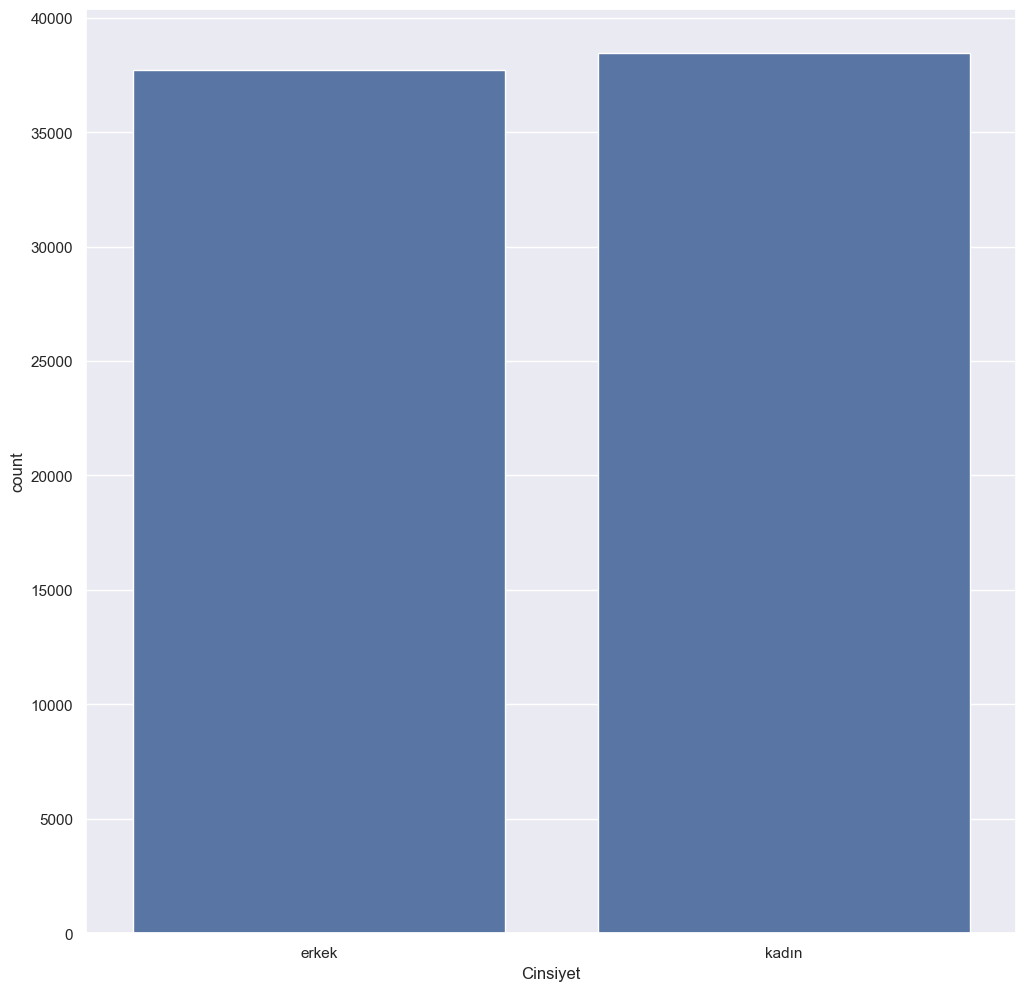

                 Universite Turu  Ratio
Universite Turu                        
devlet                     62732 82.354
ozel                       13442 17.646


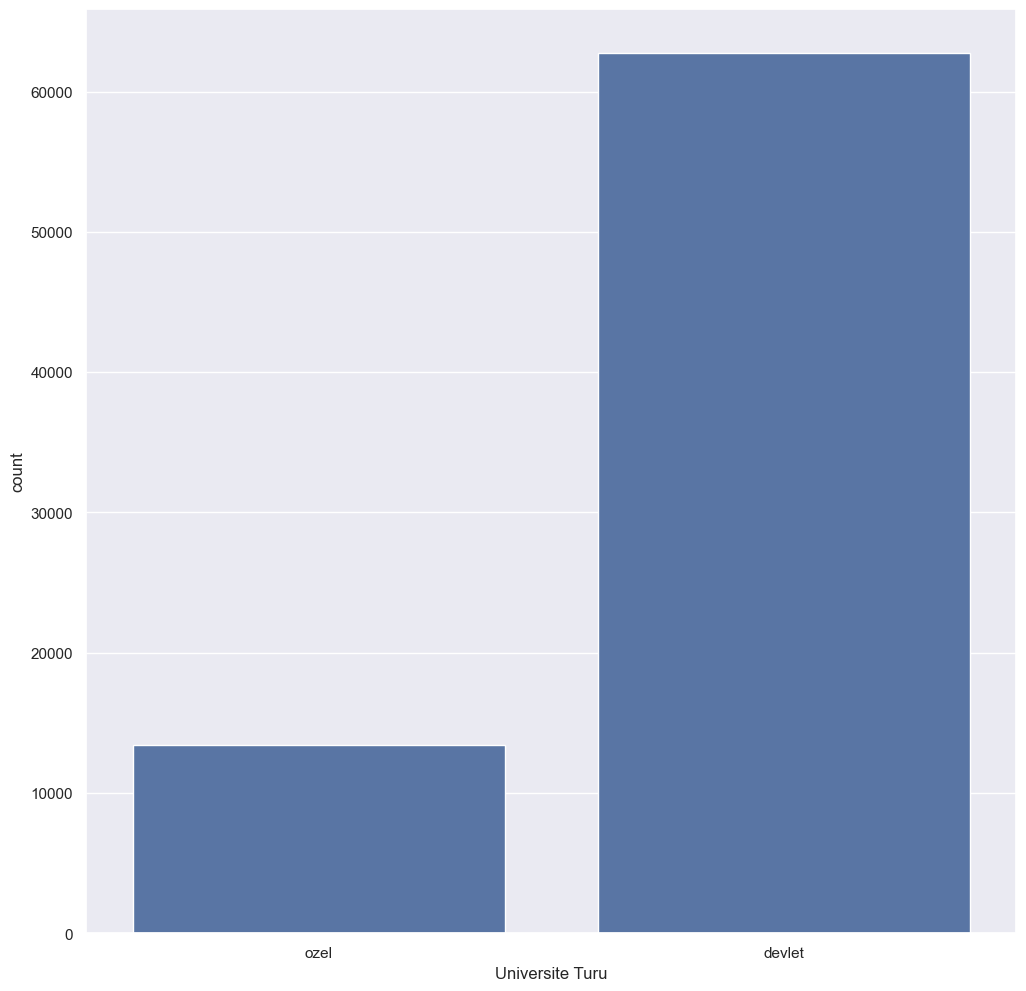

                 Burs Aliyor mu?  Ratio
Burs Aliyor mu?                        
hayır                      61650 80.933
evet                       14524 19.067


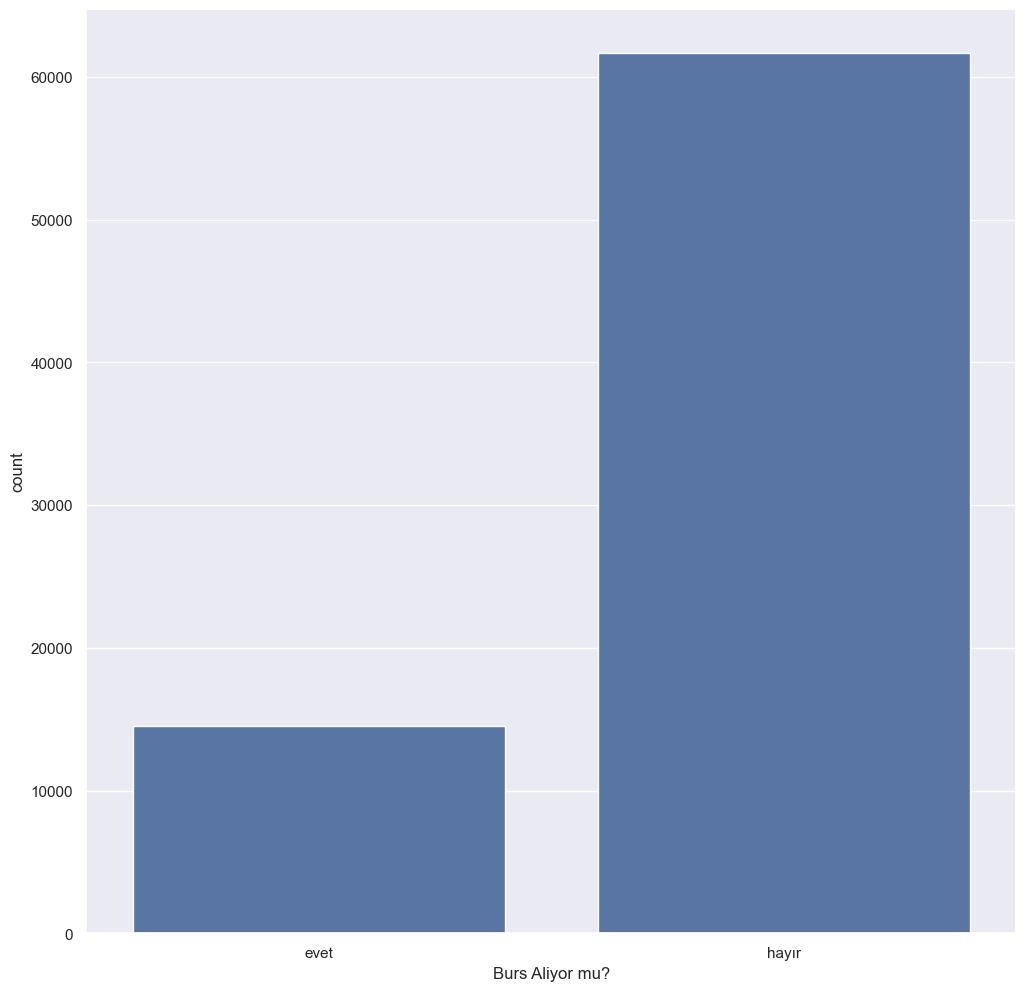

                           Universite Not Ortalamasi  Ratio
Universite Not Ortalamasi                                  
iyi                                            45681 59.969
kotu                                           30493 40.031


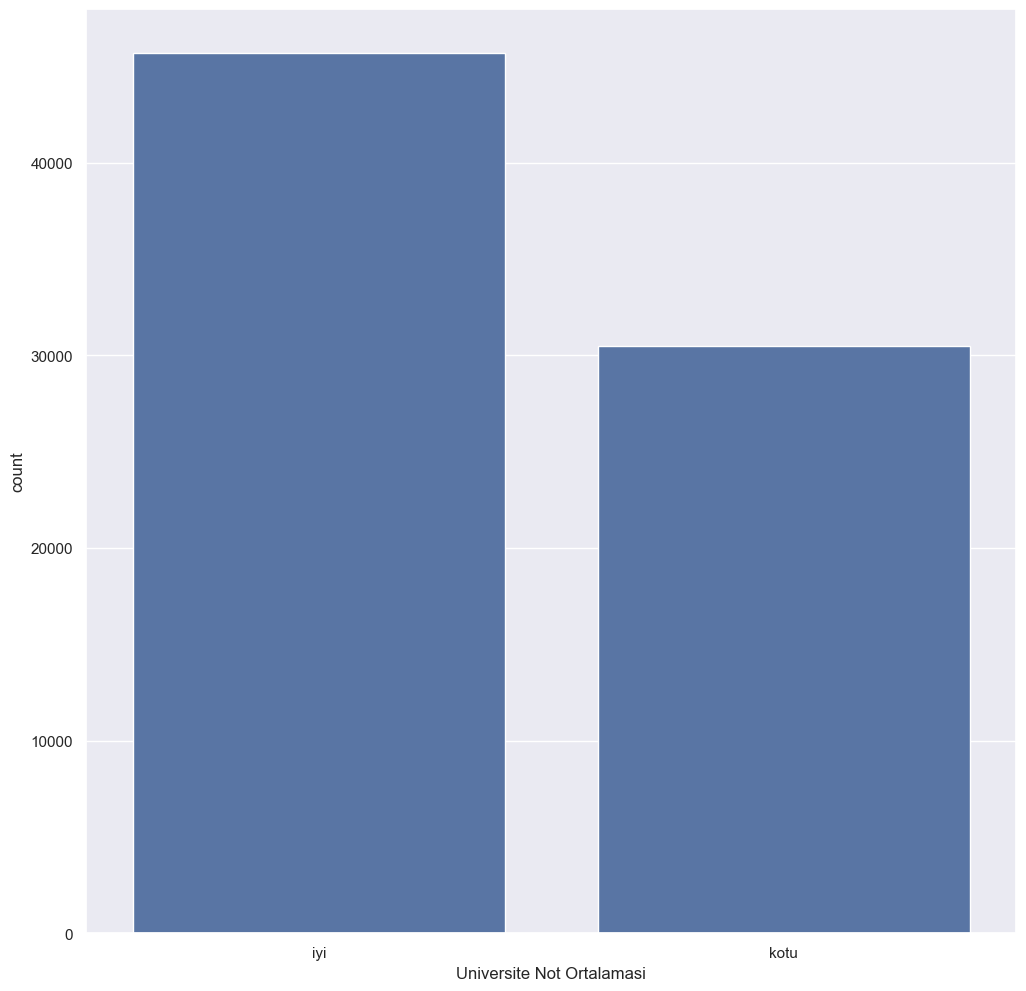

           Lise Turu  Ratio
Lise Turu                  
anadolu        20369 26.740
devlet         15446 20.277
diger          15189 19.940
özel            8848 11.616
düz             6968  9.147
meslek          6535  8.579
fen             2819  3.701


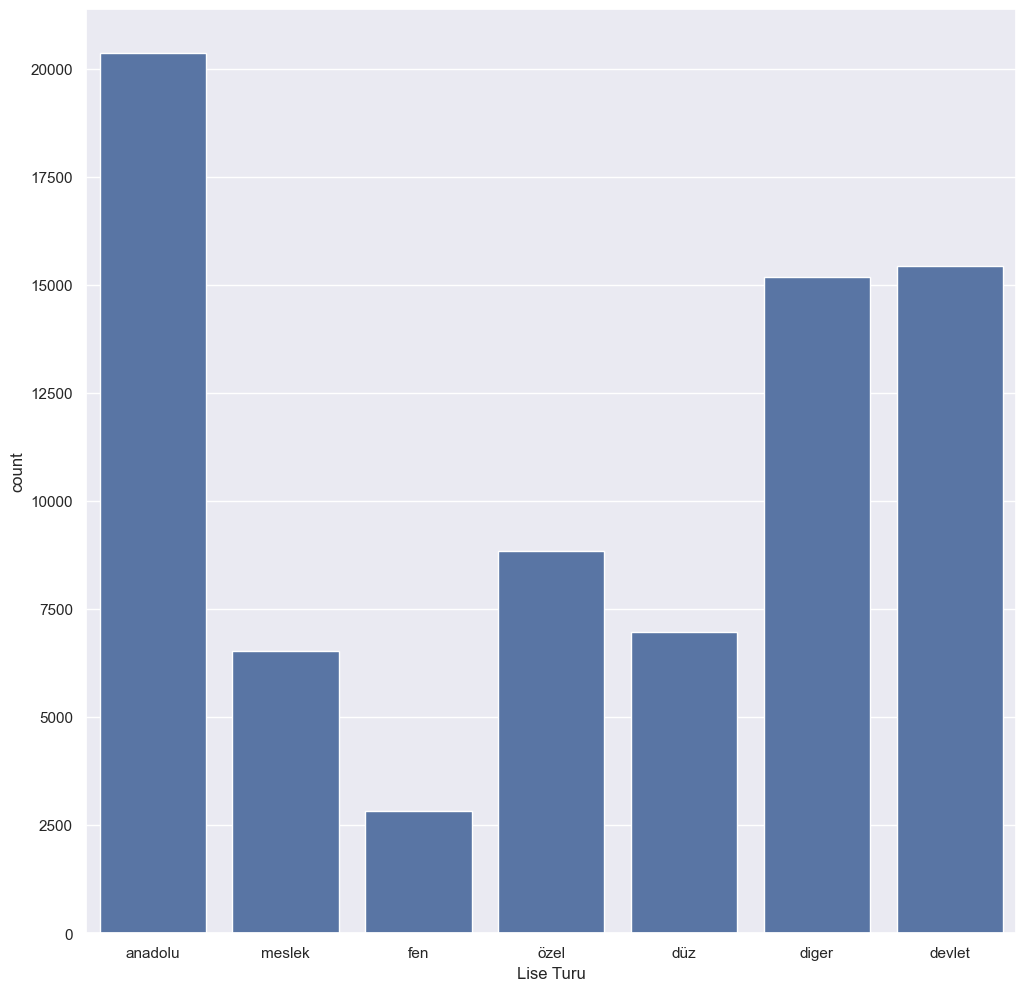

              Lise Bolumu  Ratio
Lise Bolumu                     
sayisal             40360 52.984
esit agirlik        24266 31.856
diger               11548 15.160


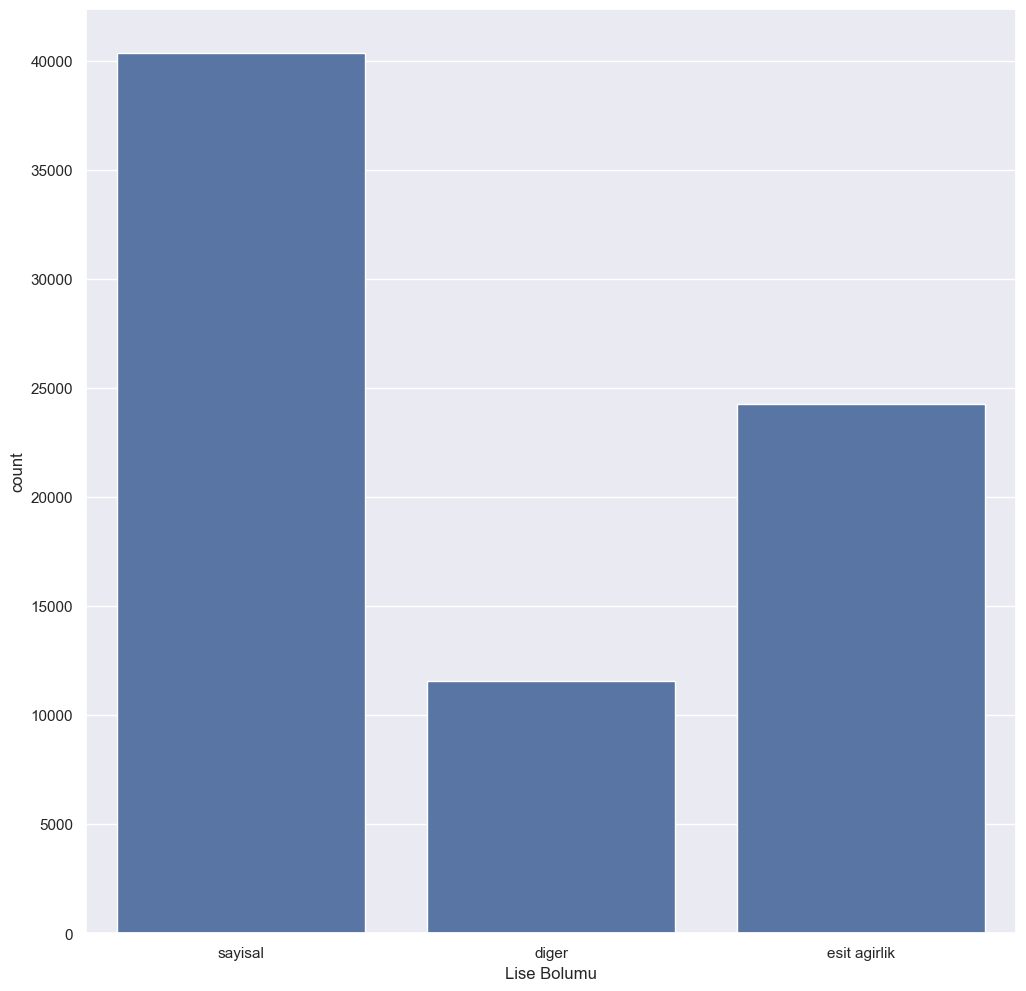

                     Lise Mezuniyet Notu  Ratio
Lise Mezuniyet Notu                            
A+                                 42831 56.228
B                                  17331 22.752
A                                   9964 13.081
C                                   6048  7.940


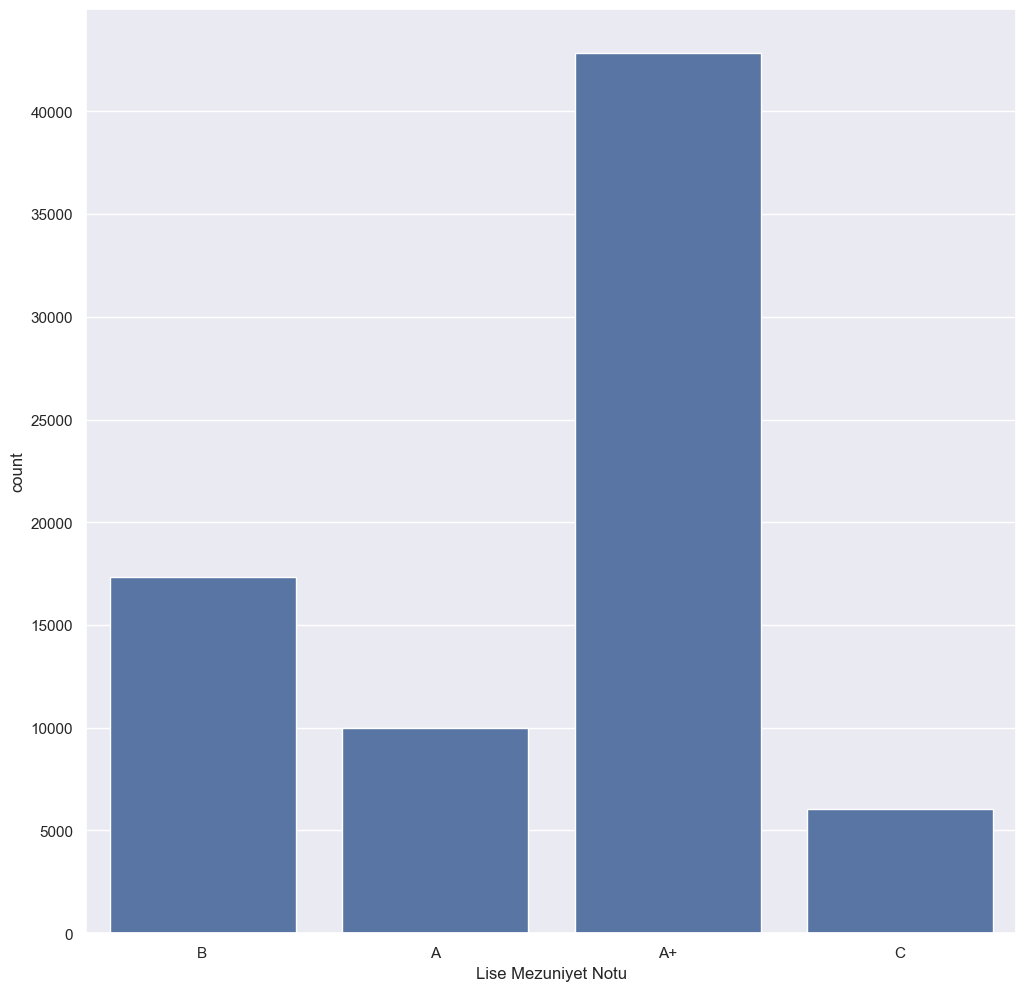

                                    Baska Bir Kurumdan Burs Aliyor mu?  Ratio
Baska Bir Kurumdan Burs Aliyor mu?                                           
hayır                                                            55402 72.731
evet                                                             20772 27.269


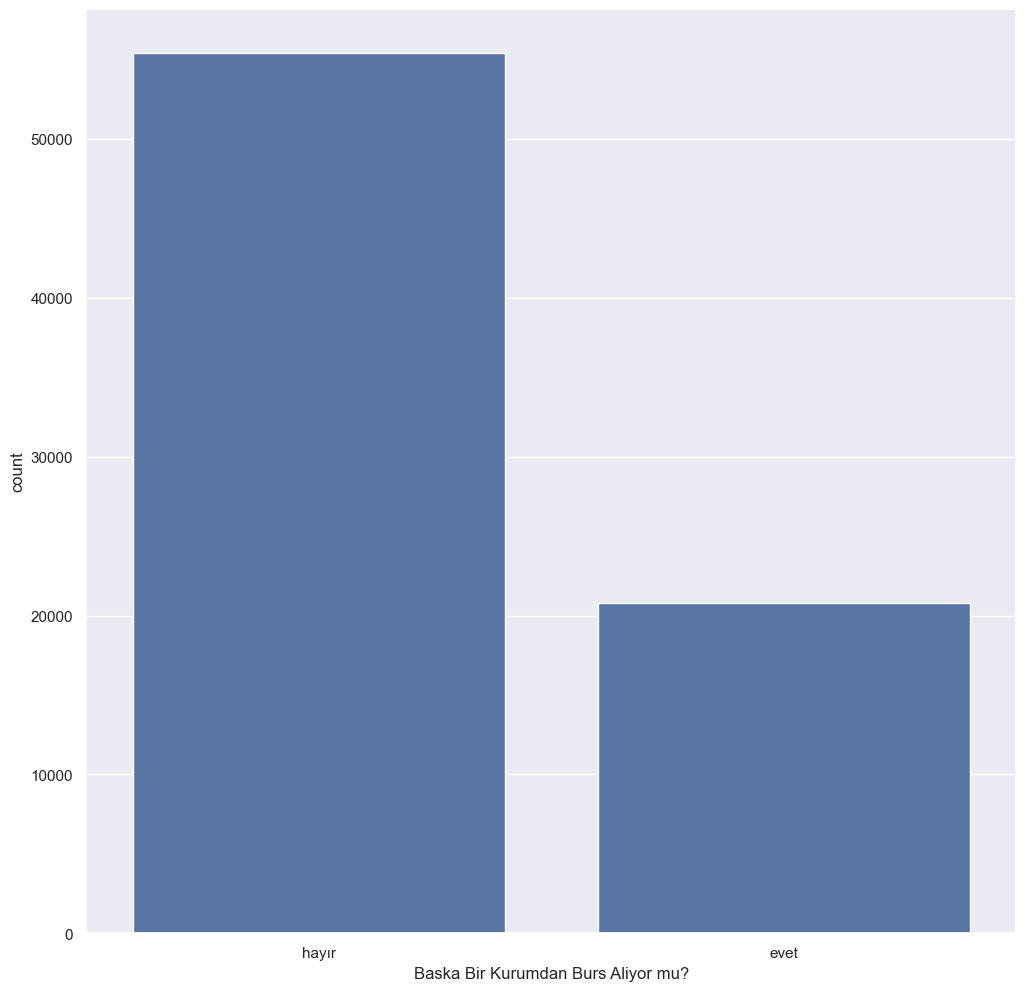

                                  Burs Aldigi Baska Kurum  Ratio
Burs Aldigi Baska Kurum                                         
almiyor                                             55336 72.644
kyk                                                 14710 19.311
diger                                                4721  6.198
devlet                                                866  1.137
gsb                                                   230  0.302
tev                                                   163  0.214
cagdas yasami destekleme dernegi                      148  0.194


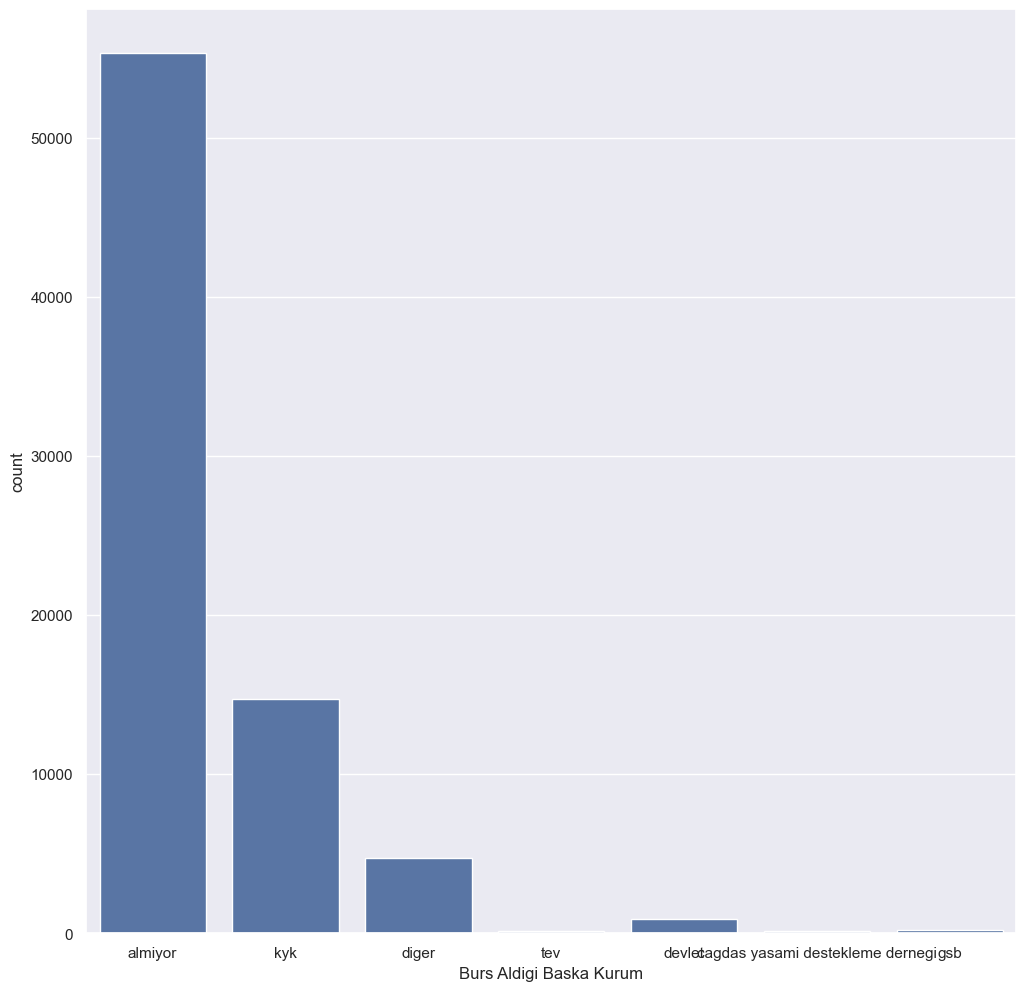

                    Anne Egitim Durumu  Ratio
Anne Egitim Durumu                           
ilkokul                          30128 39.552
yok                              18519 24.311
lise                             15757 20.686
üniversite                       11770 15.451


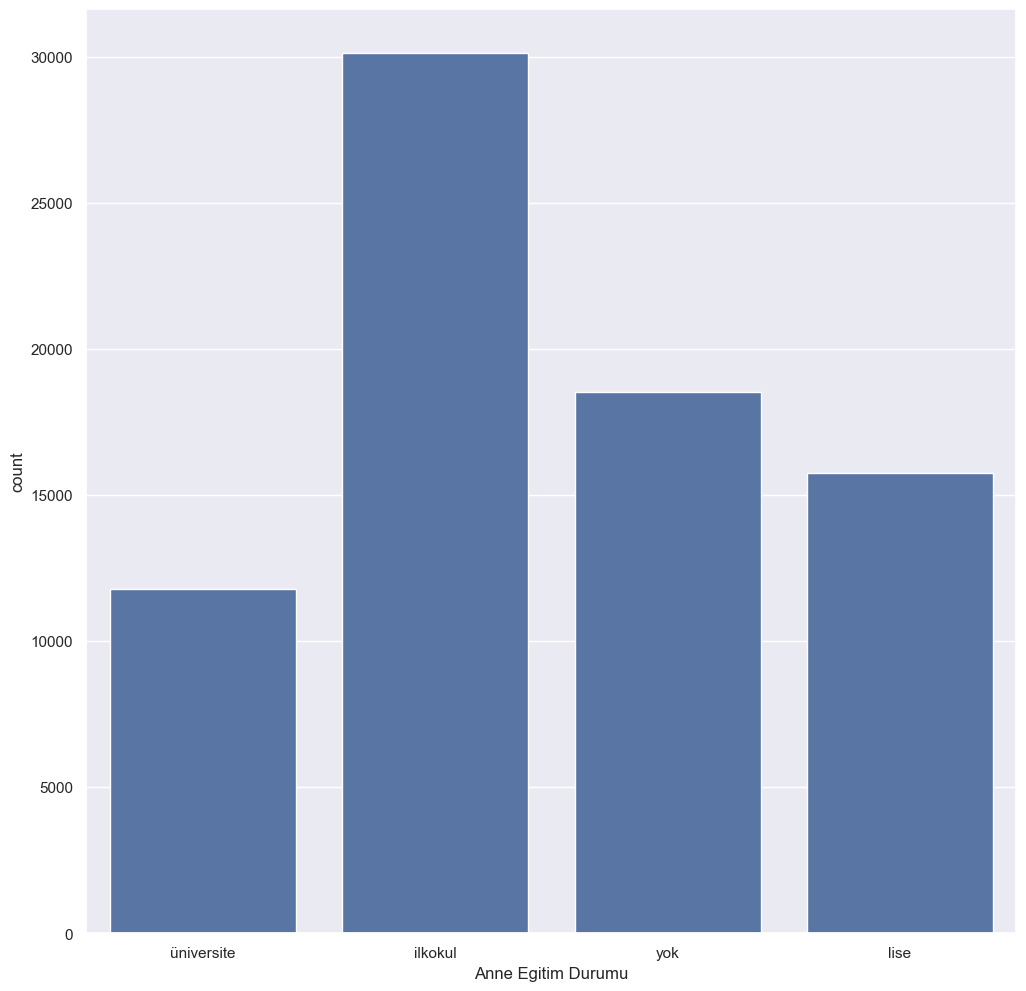

                     Anne Calisma Durumu  Ratio
Anne Calisma Durumu                            
Hayır                              63312 83.115
Evet                               12862 16.885


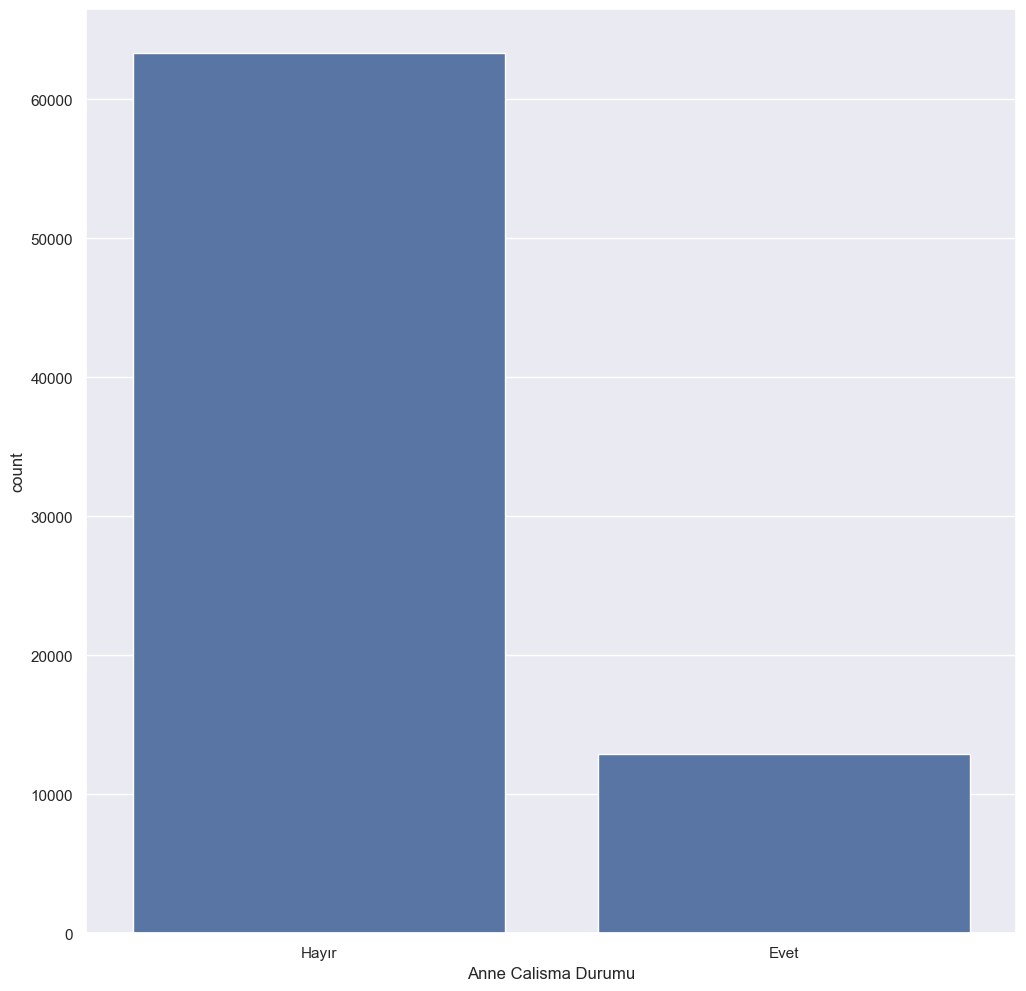

                    Baba Egitim Durumu  Ratio
Baba Egitim Durumu                           
ilkokul                          22574 29.635
üniversite                       20110 26.400
lise                             18601 24.419
yok                              14889 19.546


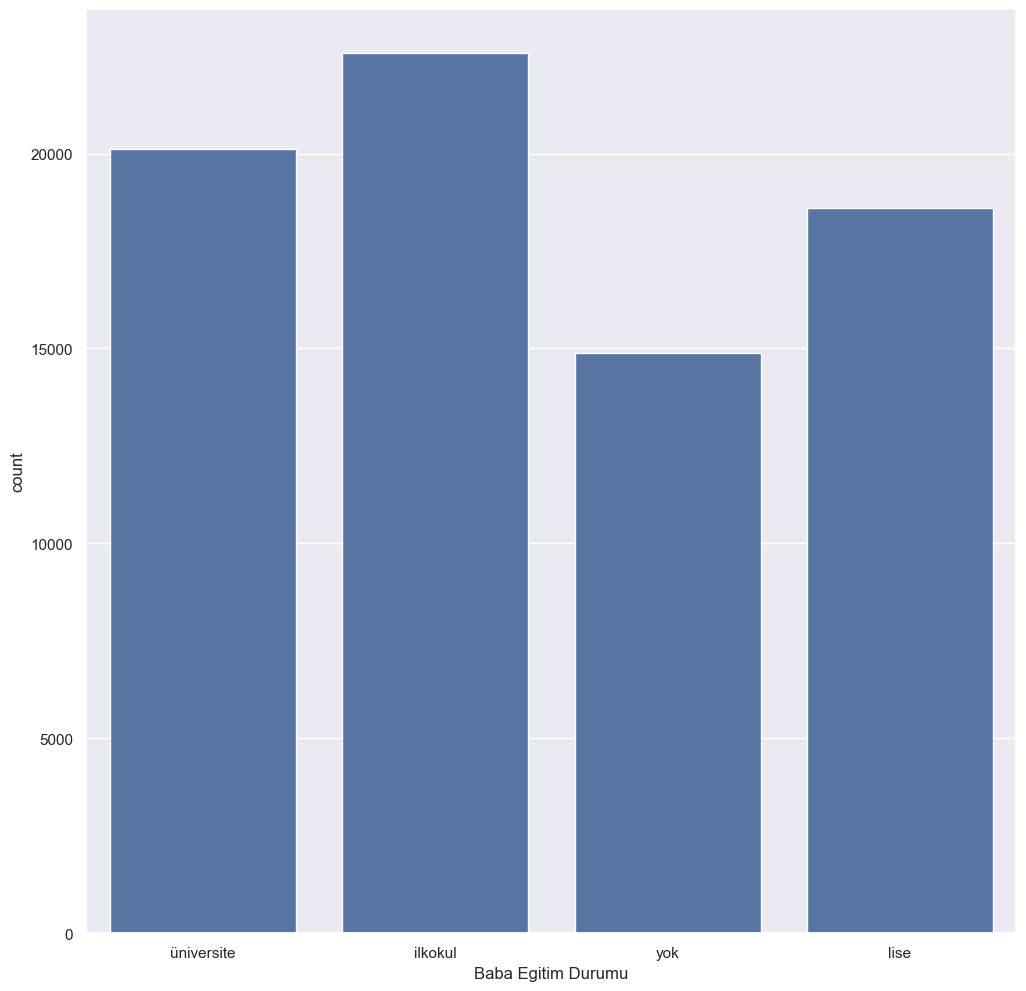

                     Baba Calisma Durumu  Ratio
Baba Calisma Durumu                            
Hayır                              41438 54.399
Evet                               34736 45.601


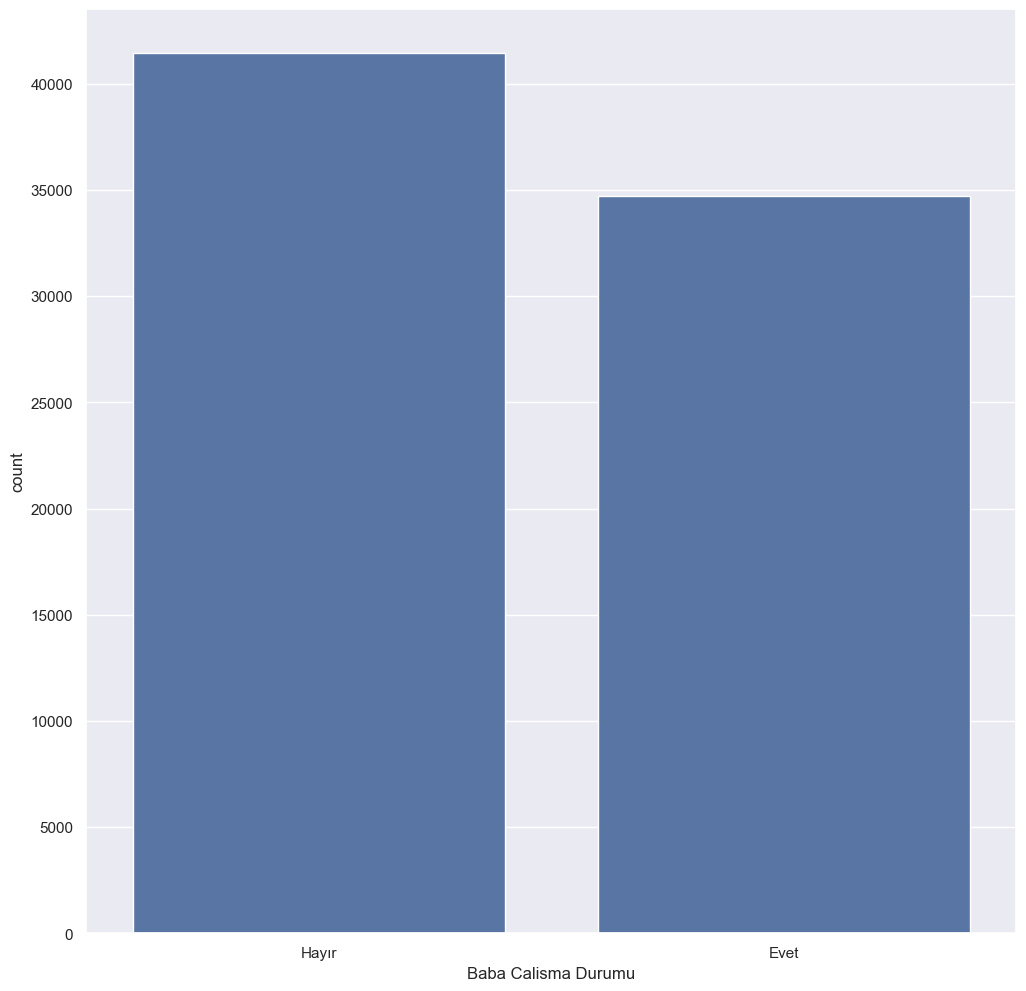

             Baba Sektor  Ratio
Baba Sektor                    
yok                34831 45.726
özel               18406 24.163
kamu               12019 15.778
diger              10918 14.333


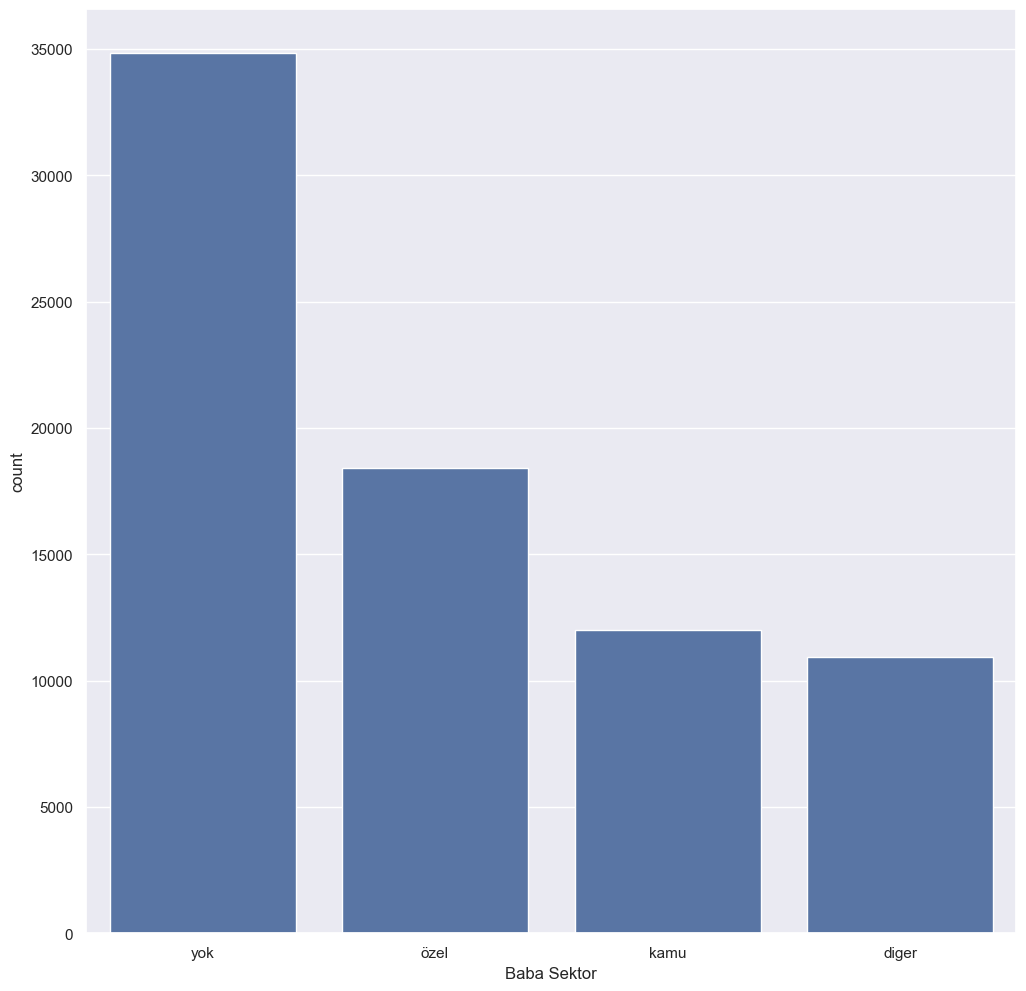

                                                    Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?  \
Girisimcilik Kulupleri Tarzi Bir Kulube Uye mis...                                                         
Hayır                                                                                           41479      
Evet                                                                                            34695      

                                                    Ratio  
Girisimcilik Kulupleri Tarzi Bir Kulube Uye mis...         
Hayır                                              54.453  
Evet                                               45.547  


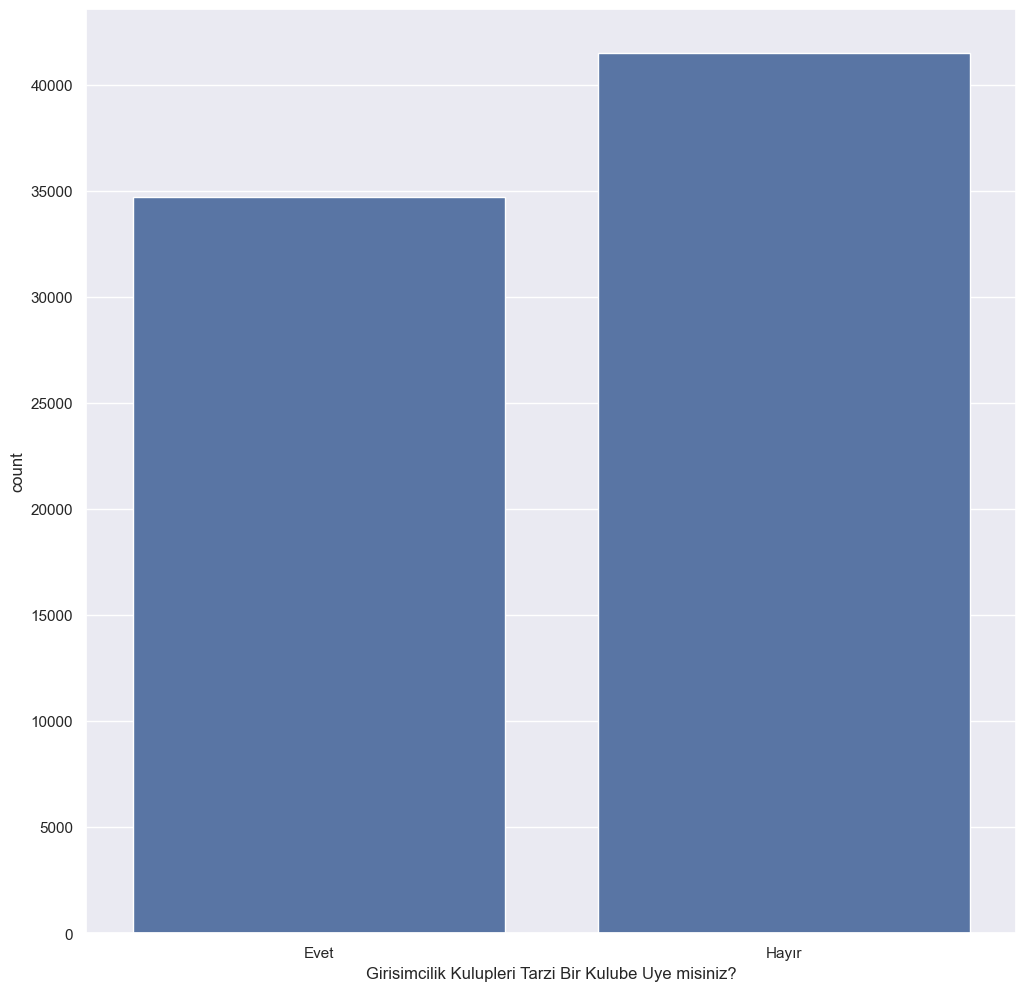

                                              Profesyonel Bir Spor Daliyla Mesgul musunuz?  \
Profesyonel Bir Spor Daliyla Mesgul musunuz?                                                 
Hayır                                                                                49780   
Evet                                                                                 26394   

                                              Ratio  
Profesyonel Bir Spor Daliyla Mesgul musunuz?         
Hayır                                        65.350  
Evet                                         34.650  


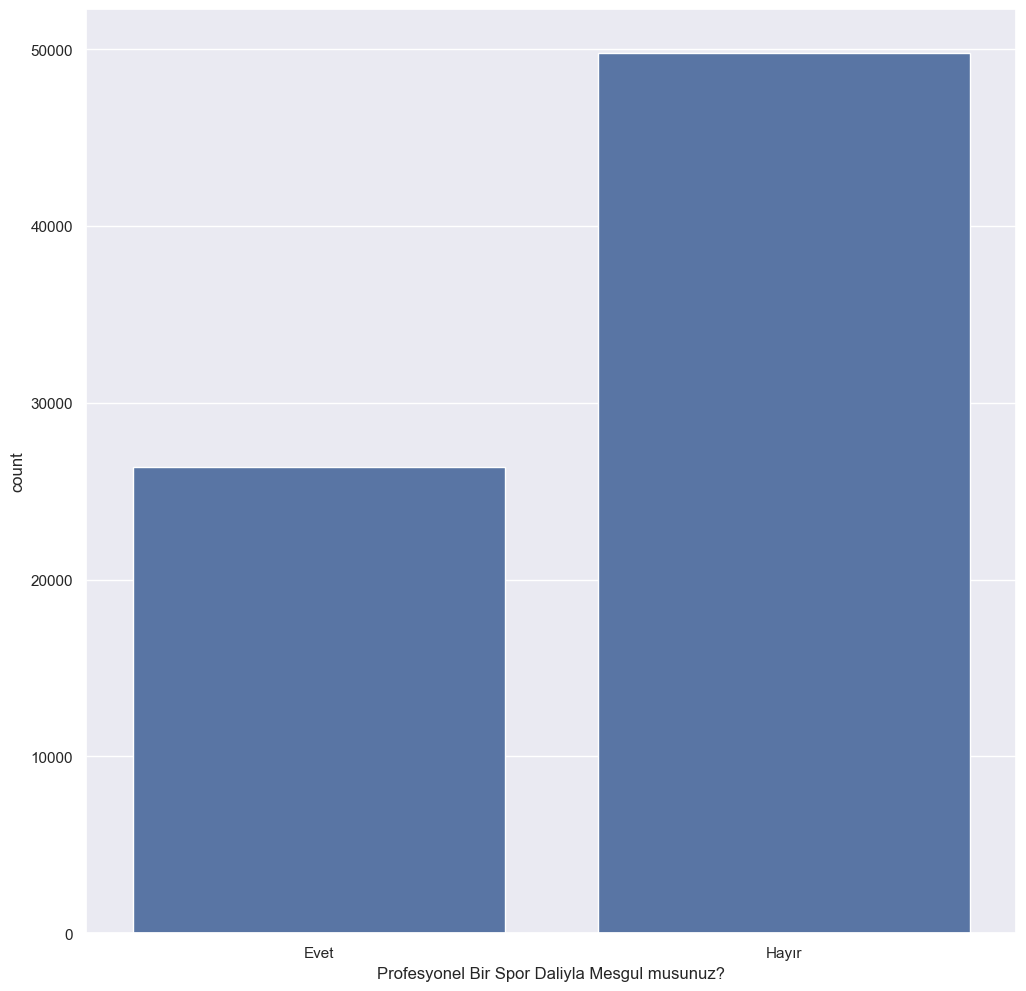

                               Spor Dalindaki Rolunuz Nedir?  Ratio
Spor Dalindaki Rolunuz Nedir?                                      
diger                                                  71937 94.438
kaptan                                                  4237  5.562


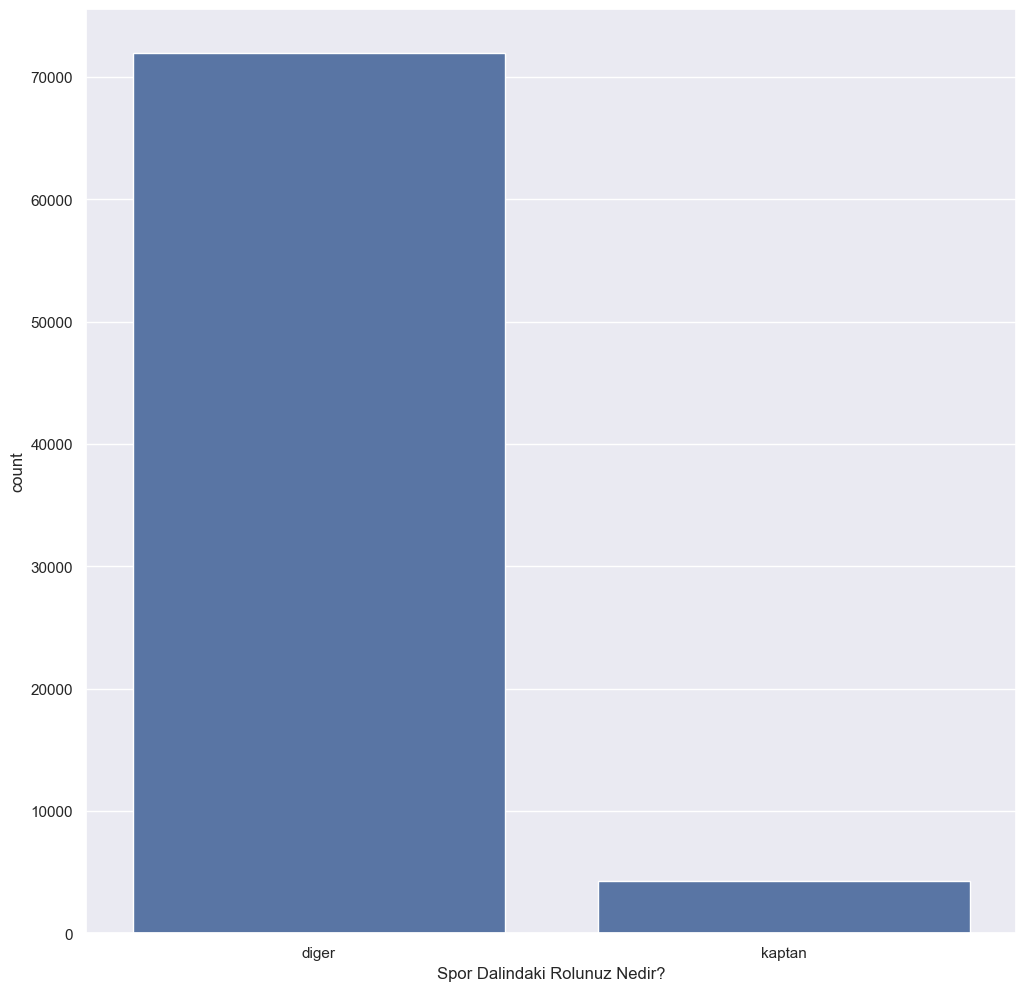

                                     Aktif olarak bir STK üyesi misiniz?  \
Aktif olarak bir STK üyesi misiniz?                                        
Hayır                                                              55337   
Evet                                                               20837   

                                     Ratio  
Aktif olarak bir STK üyesi misiniz?         
Hayır                               72.646  
Evet                                27.354  


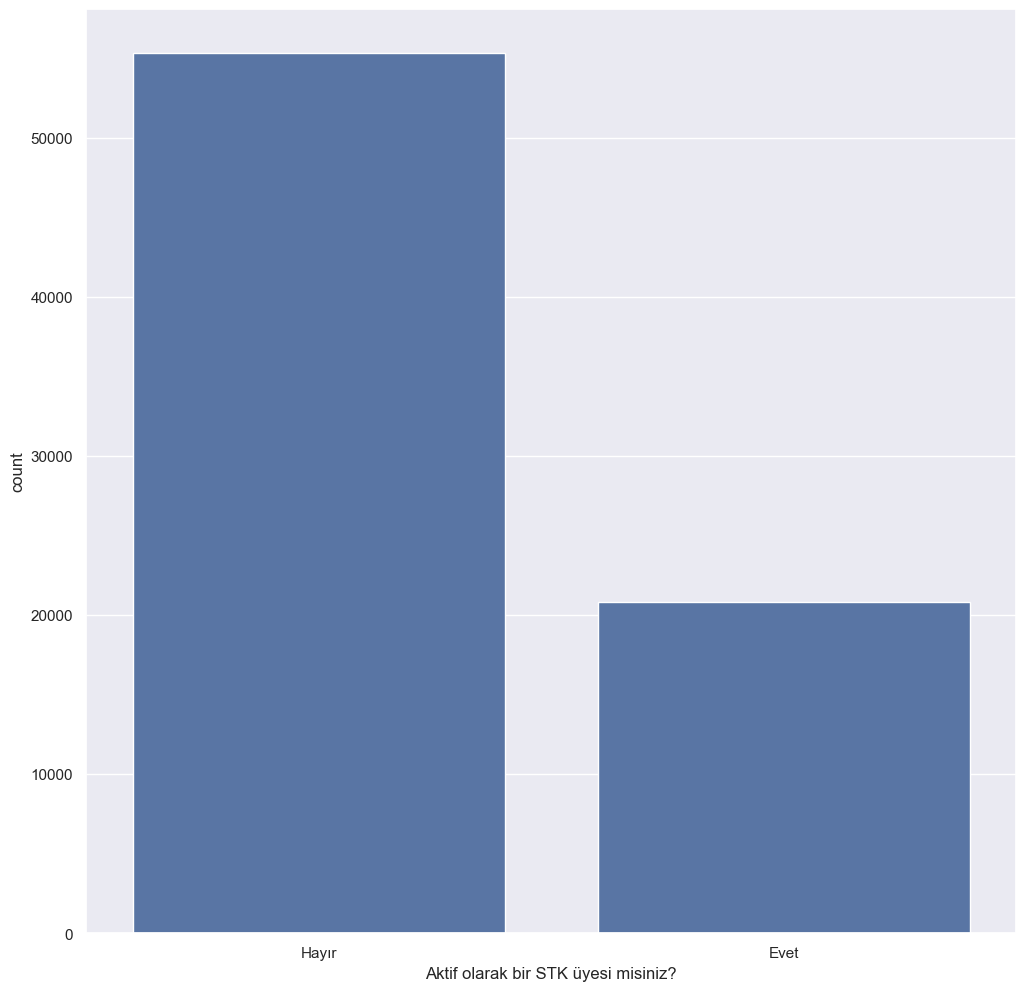

                              Stk Projesine Katildiniz Mi?  Ratio
Stk Projesine Katildiniz Mi?                                     
Hayır                                                59018 77.478
Evet                                                 17156 22.522


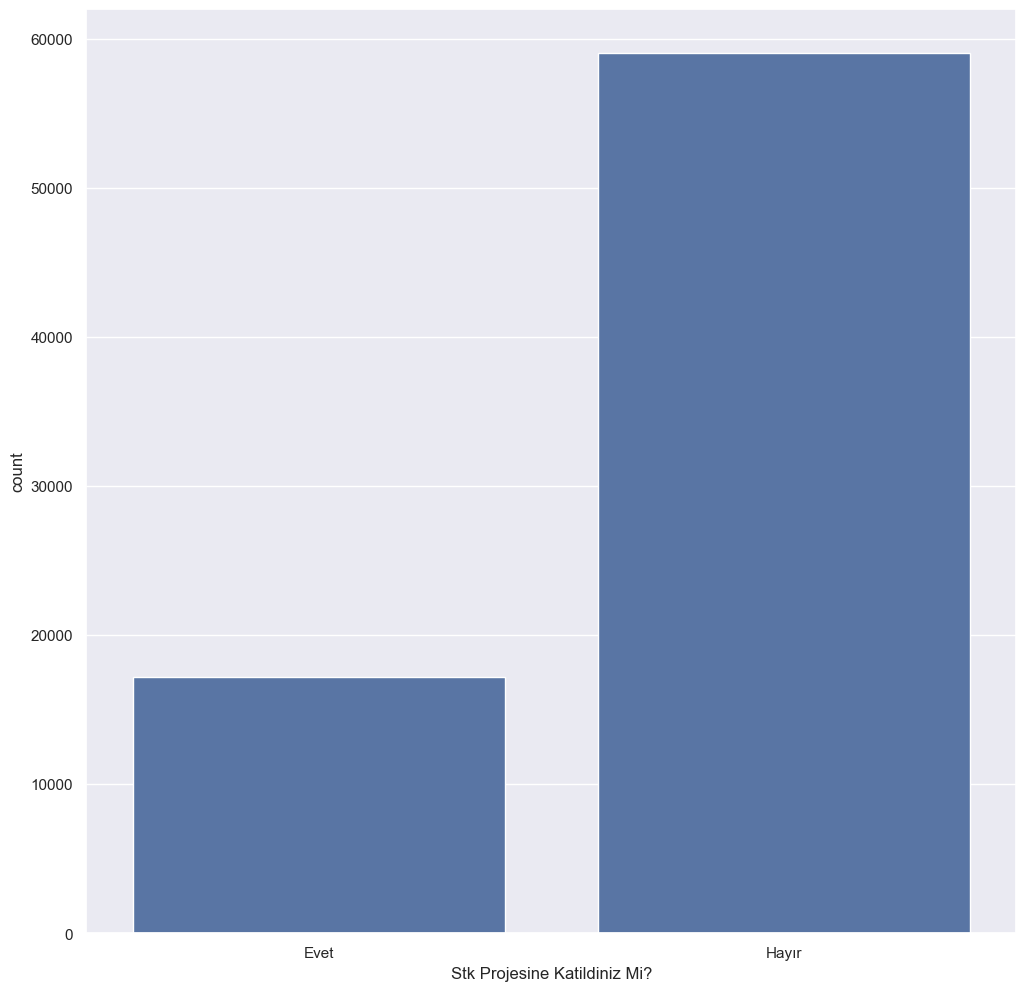

                                           Girisimcilikle Ilgili Deneyiminiz Var Mi?  \
Girisimcilikle Ilgili Deneyiminiz Var Mi?                                              
Hayır                                                                          54555   
Evet                                                                           21619   

                                           Ratio  
Girisimcilikle Ilgili Deneyiminiz Var Mi?         
Hayır                                     71.619  
Evet                                      28.381  


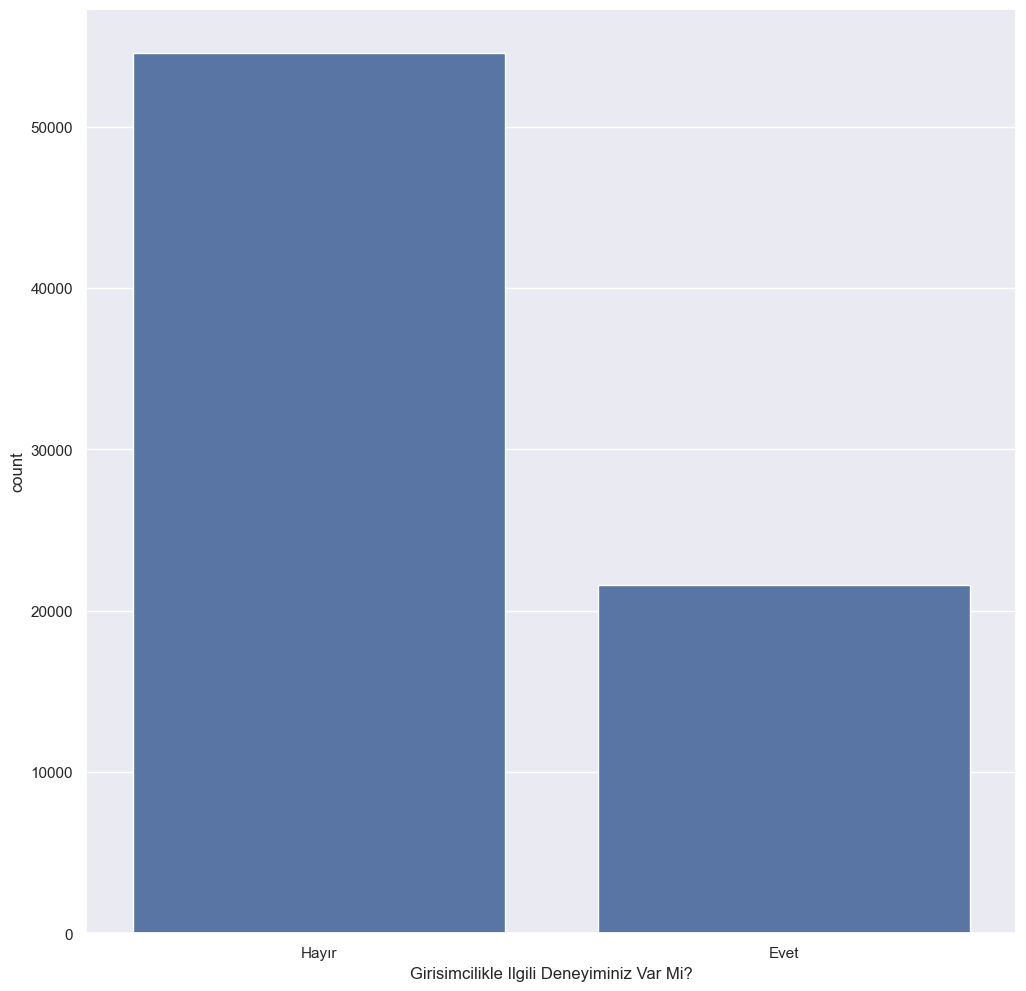

                            Ingilizce Biliyor musunuz?  Ratio
Ingilizce Biliyor musunuz?                                   
Evet                                             57735 75.794
Hayır                                            18439 24.206


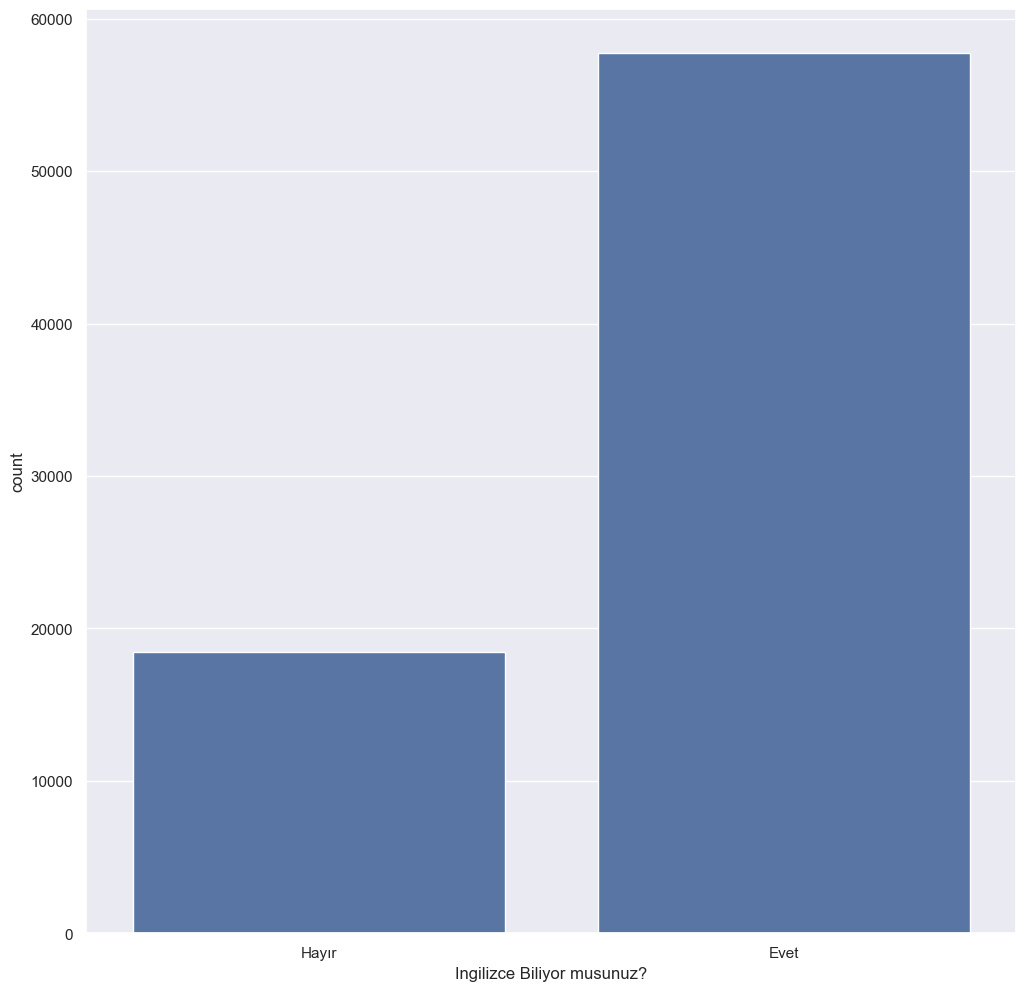

                      Ingilizce Seviyeniz?  Ratio
Ingilizce Seviyeniz?                             
Başlangıç                            54799 71.939
Orta                                 13057 17.141
İleri                                 8318 10.920


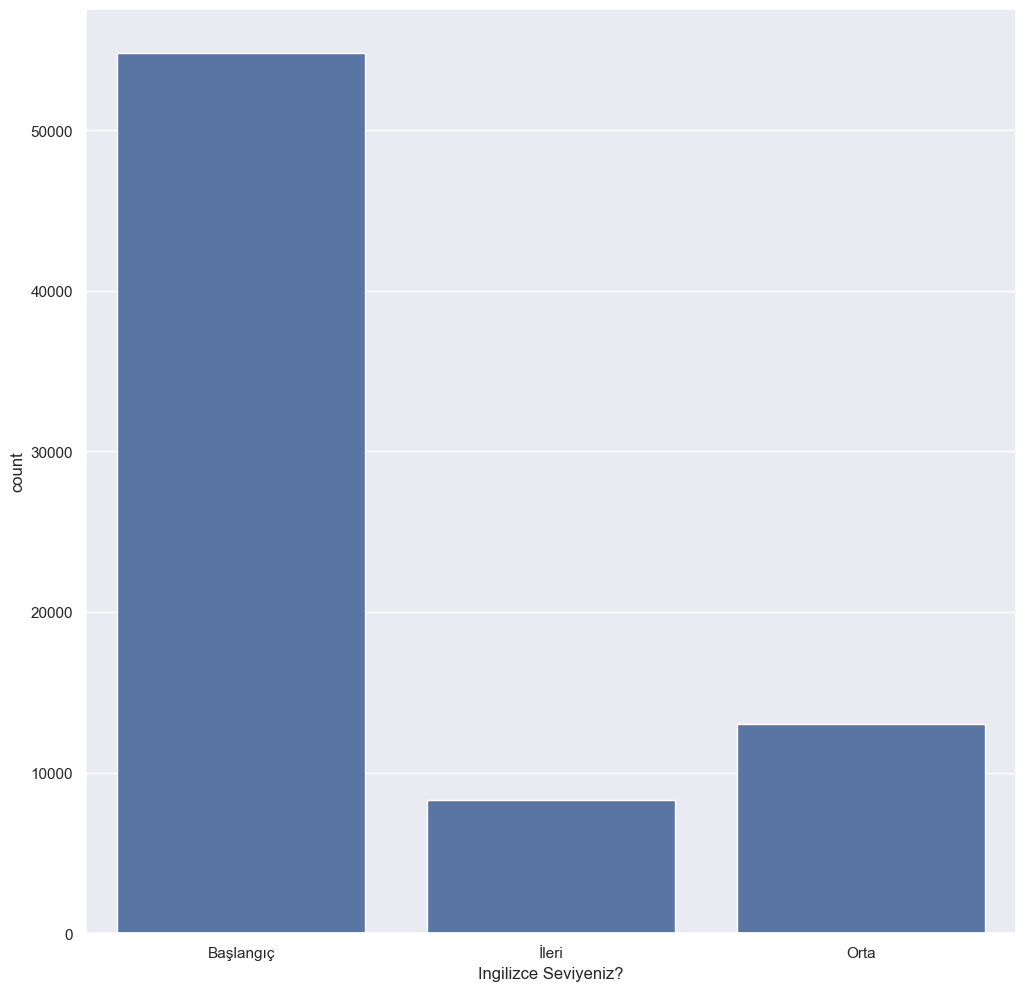

                          Universite Kacinci Sinif  Ratio
Universite Kacinci Sinif                                 
2.000                                        25088 32.935
3.000                                        19995 26.249
4.000                                        16932 22.228
1.000                                        13785 18.097
0.000                                          374  0.491


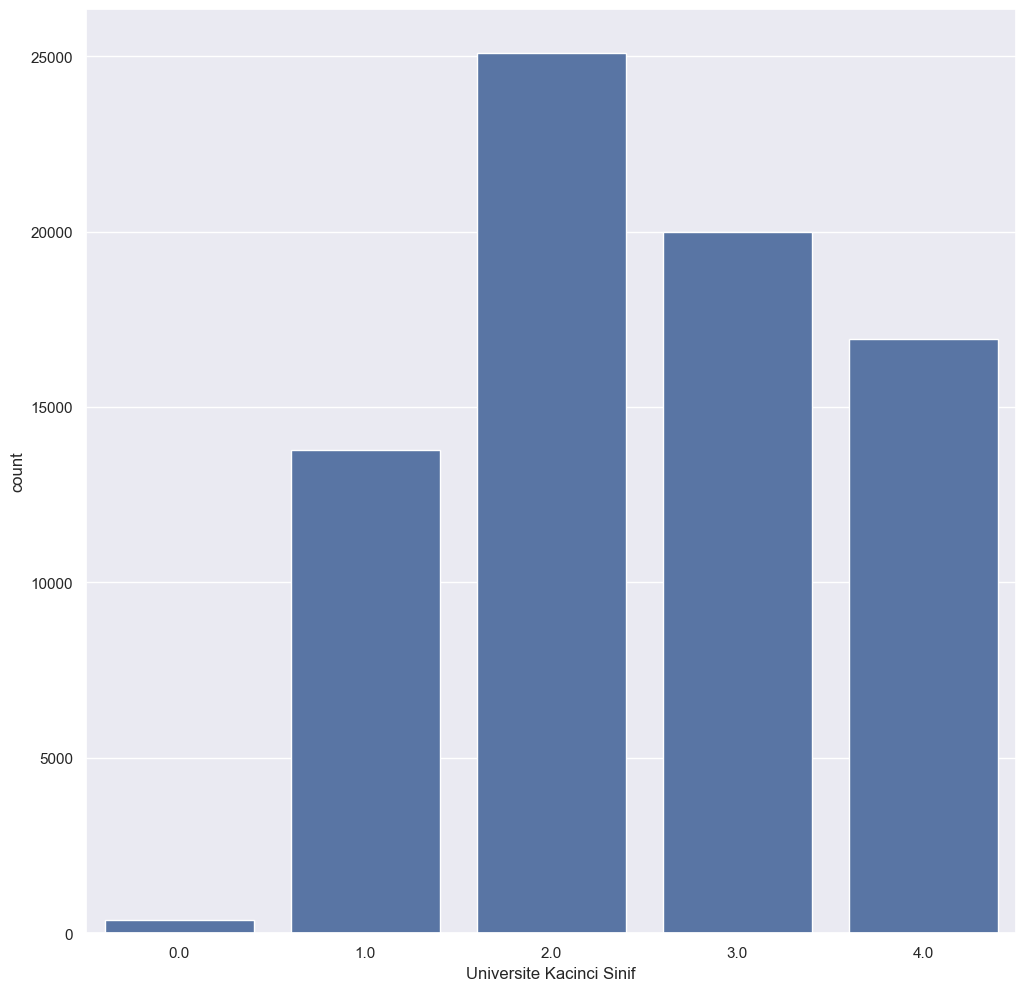

                                               Daha Once Baska Bir Universiteden Mezun Olmus  \
Daha Once Baska Bir Universiteden Mezun Olmus                                                  
0                                                                                      75018   
1                                                                                       1156   

                                               Ratio  
Daha Once Baska Bir Universiteden Mezun Olmus         
0                                             98.482  
1                                              1.518  


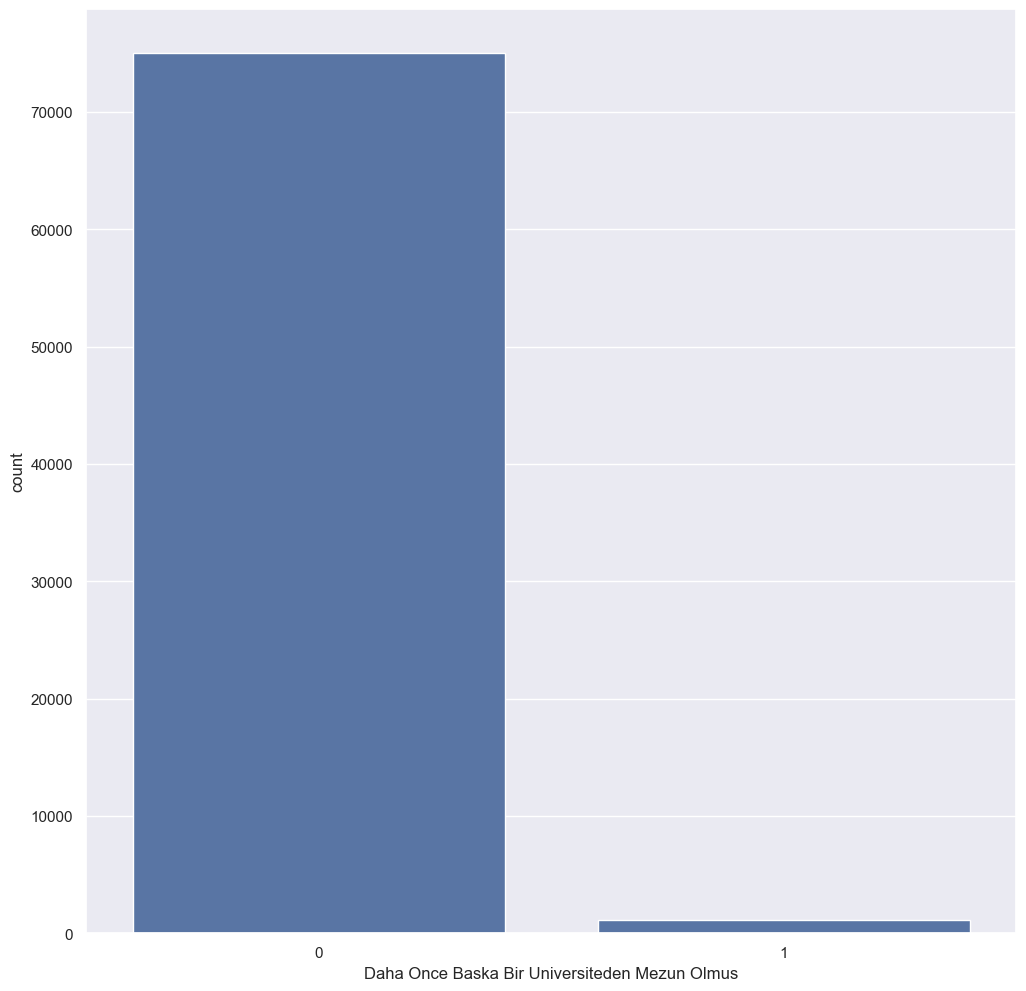

               Kardes Sayisi  Ratio
Kardes Sayisi                      
1                      25853 33.939
2                      19821 26.021
3                      10311 13.536
4                       8030 10.542
0                       6919  9.083
5                       5240  6.879


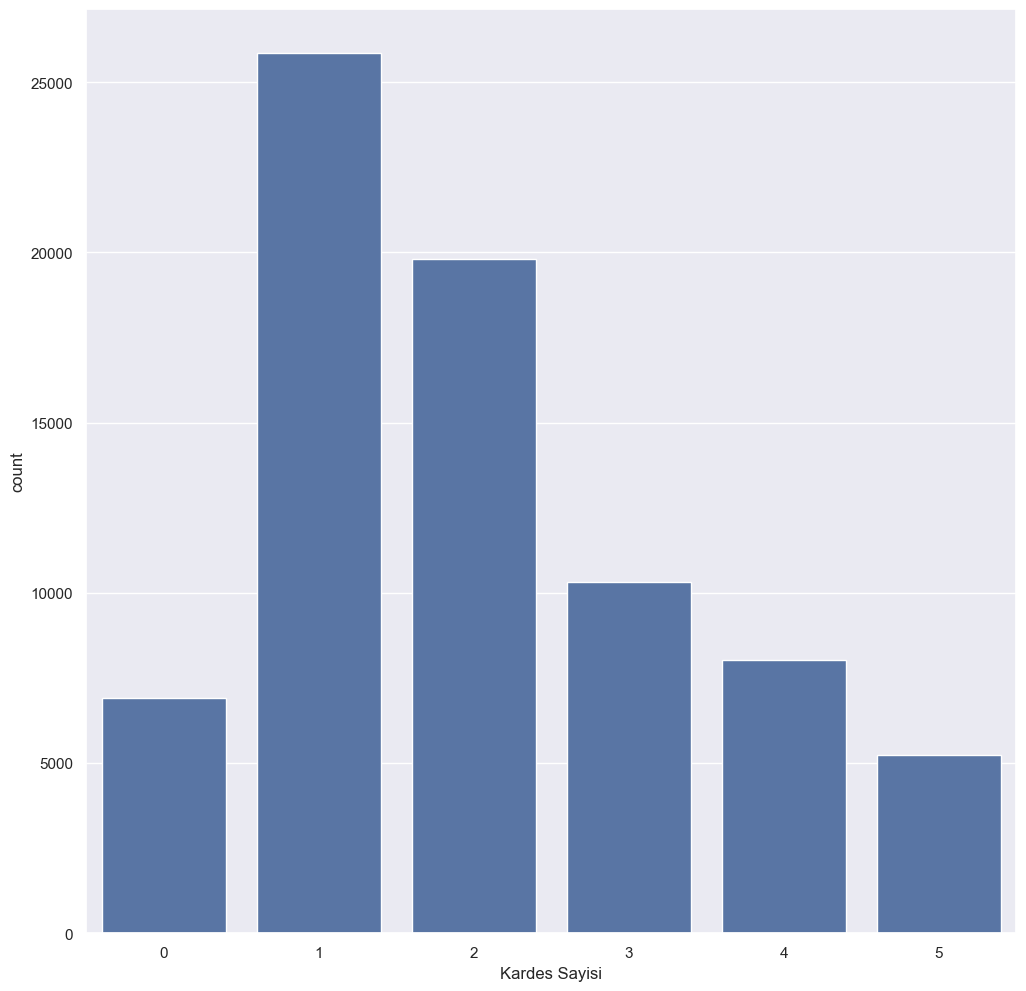

In [748]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)

count   76174.000
mean     2018.962
std         2.977
min      2014.000
5%       2014.000
10%      2015.000
20%      2016.000
30%      2017.000
40%      2018.000
50%      2019.000
60%      2020.000
70%      2021.000
80%      2022.000
90%      2023.000
95%      2023.000
99%      2023.000
max      2023.000
Name: Basvuru Yili, dtype: float64


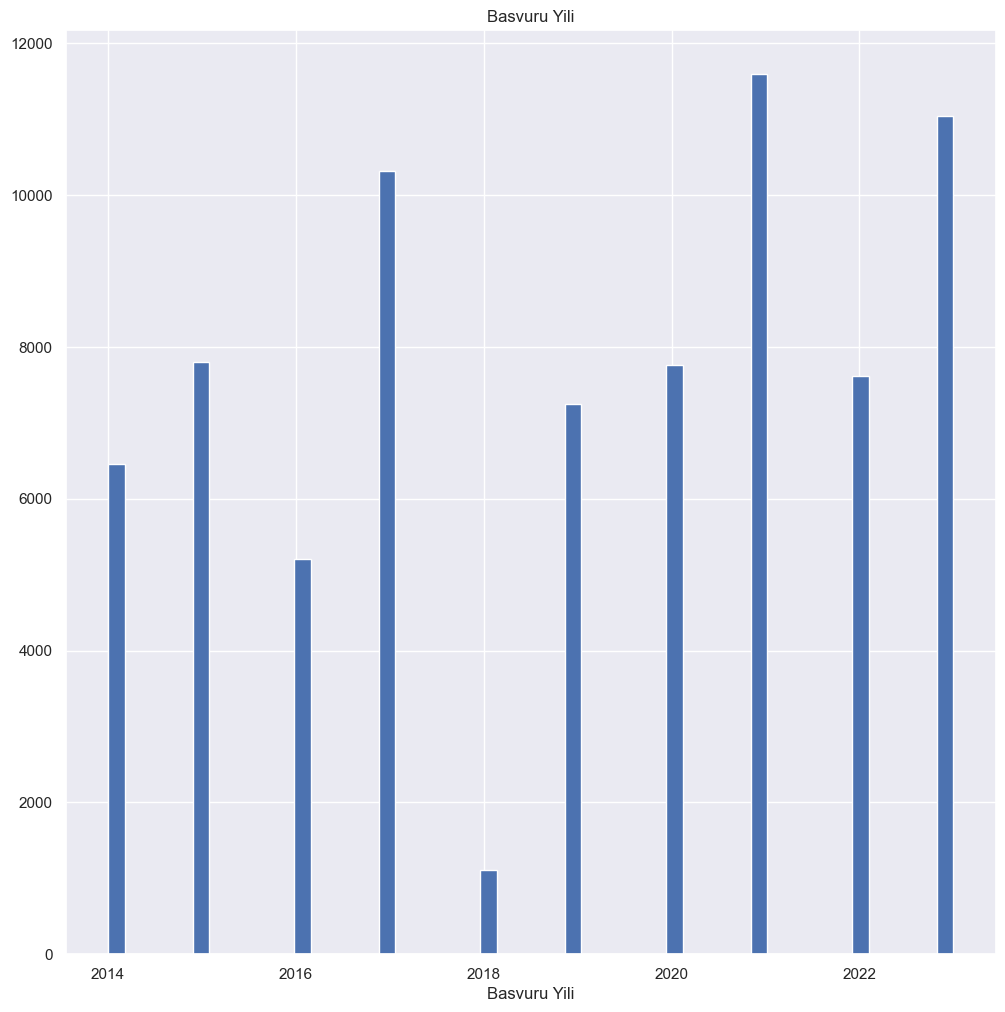

#####################################
count   65124.000
mean       32.086
std        18.139
min         0.000
5%          7.000
10%        10.000
20%        15.000
30%        20.000
40%        24.000
50%        29.000
60%        34.000
70%        40.000
80%        48.000
90%        58.000
95%        66.000
99%        78.000
max       102.000
Name: Degerlendirme Puani, dtype: float64


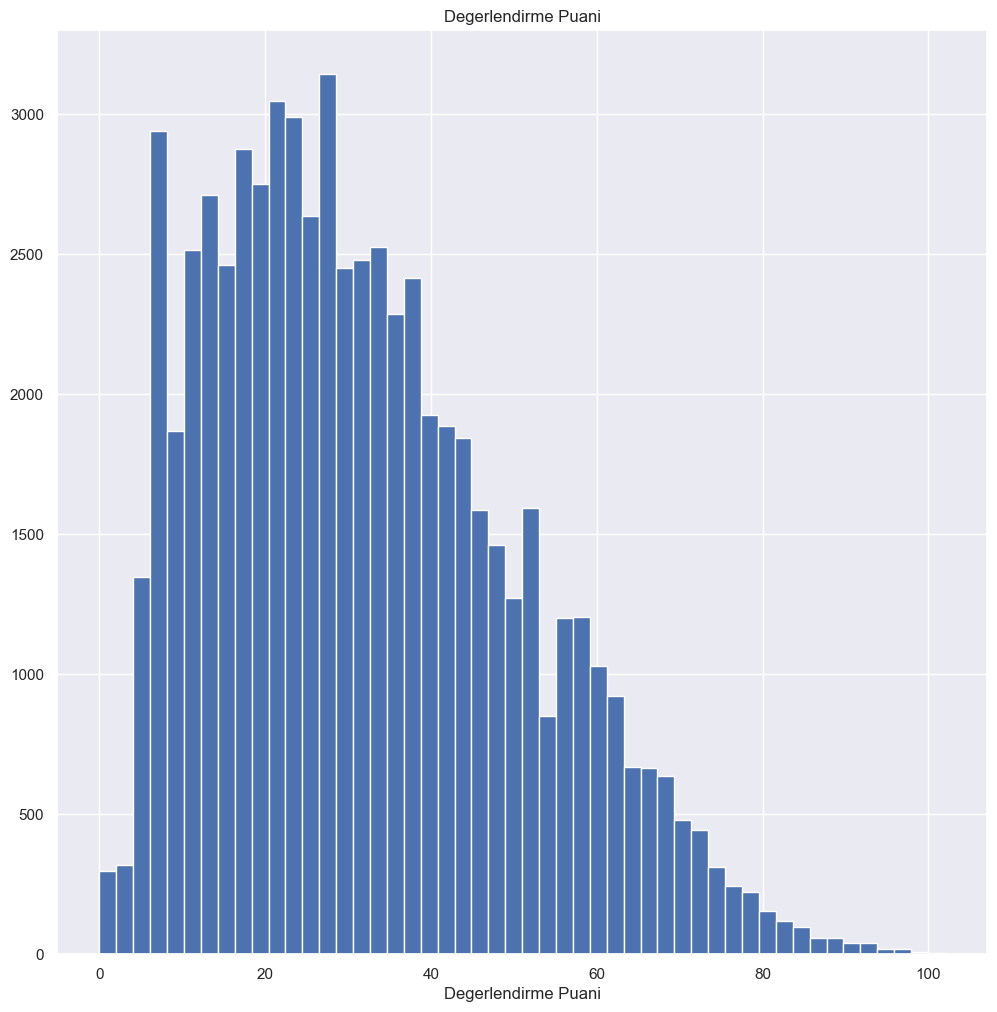

#####################################
count   76174.000
mean    28640.152
std     19857.279
min         0.000
5%       1904.000
10%      3808.300
20%      7617.000
30%     11802.900
40%     19420.200
50%     27037.500
60%     34654.800
70%     42272.100
80%     49889.400
90%     57506.700
95%     61315.350
99%     64362.270
max     65124.000
Name: id, dtype: float64


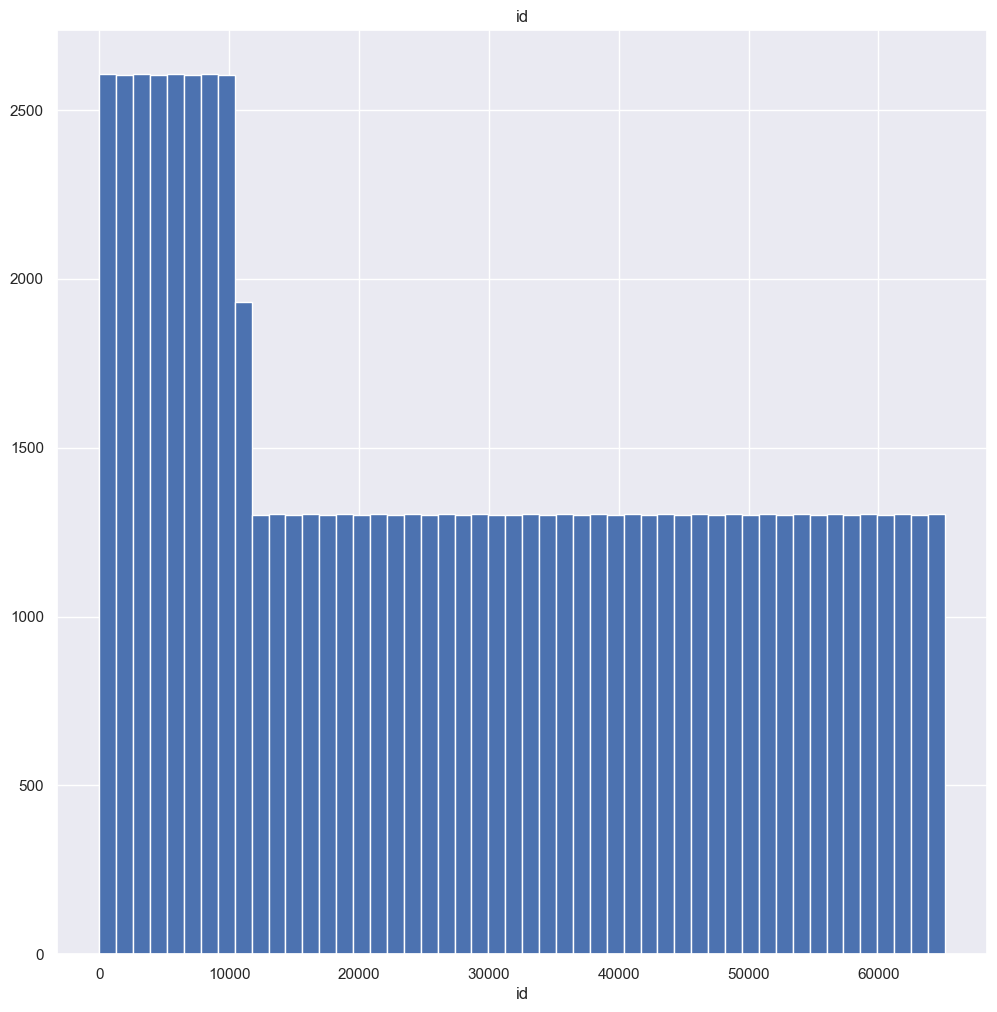

#####################################


In [749]:
def num_summary(dataframe, numerical_col, plot=True):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)

In [750]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df,"Degerlendirme Puani",col)

          TARGET_MEAN
Cinsiyet             
erkek          31.746
kadın          32.437


                 TARGET_MEAN
Universite Turu             
devlet                31.001
ozel                  37.092


                 TARGET_MEAN
Burs Aliyor mu?             
evet                  35.594
hayır                 31.222


                           TARGET_MEAN
Universite Not Ortalamasi             
iyi                             34.203
kotu                            29.164


           TARGET_MEAN
Lise Turu             
anadolu         35.163
devlet          30.817
diger           29.310
düz             29.843
fen             39.023
meslek          26.336
özel            35.073


              TARGET_MEAN
Lise Bolumu              
diger              28.062
esit agirlik       31.761
sayisal            33.480


                     TARGET_MEAN
Lise Mezuniyet Notu             
A                         23.782
A+                        31.770
B                         26.948
C         

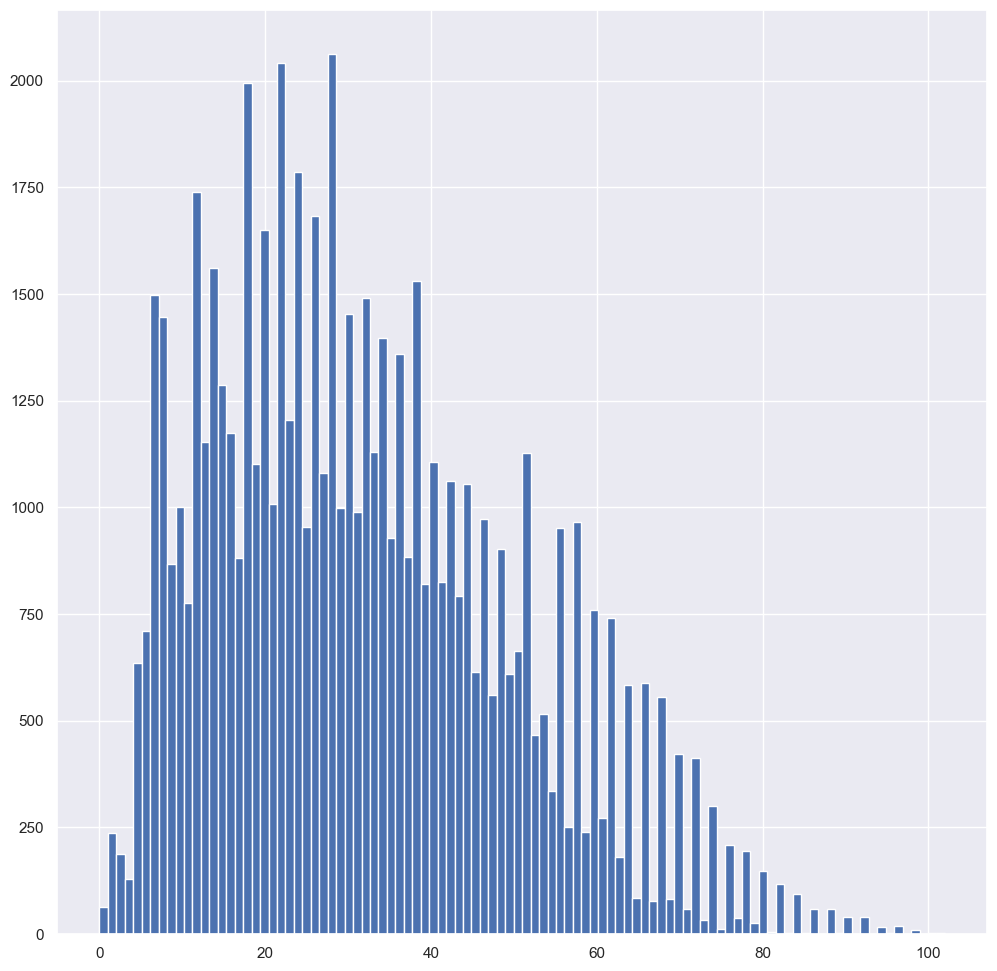

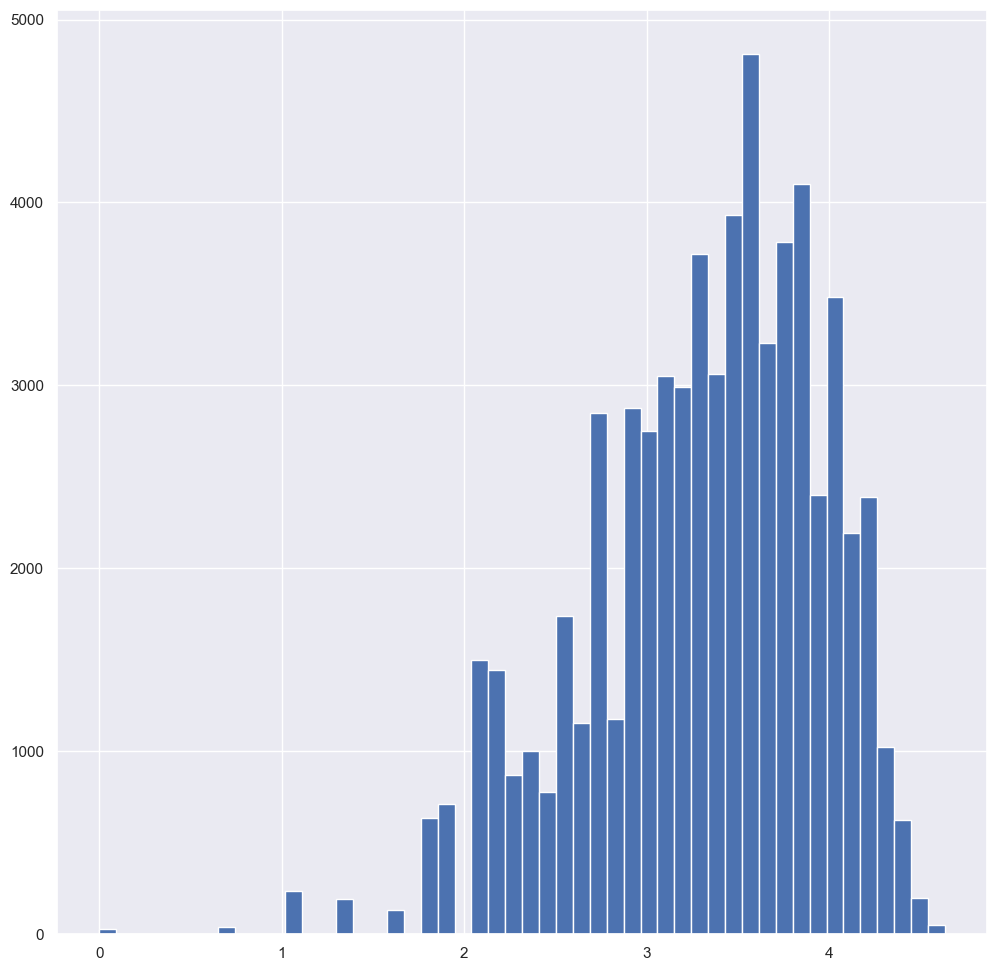

In [751]:
# Bağımlı değişkenin incelenmesi
df["Degerlendirme Puani"].hist(bins=100)
plt.show()

# Bağımlı değişkenin logaritmasının incelenmesi
np.log1p(df['Degerlendirme Puani']).hist(bins=50)
plt.show()

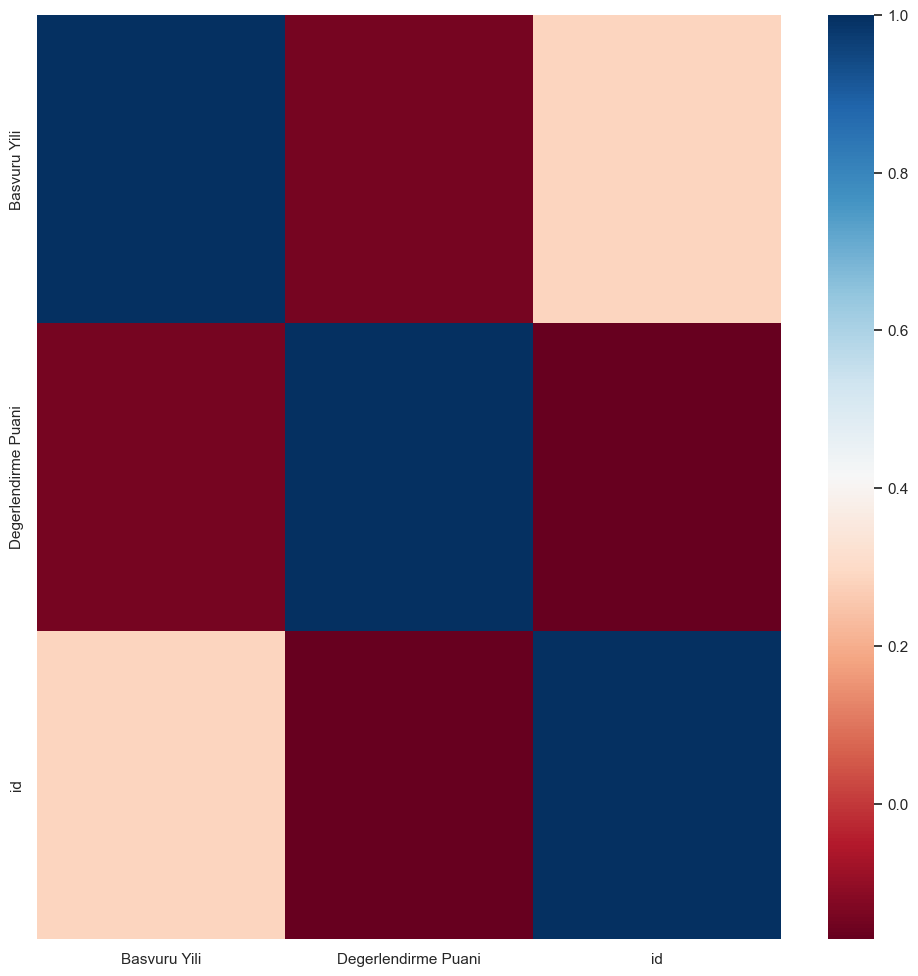

In [752]:
# 5. Korelasyon Analizi (Analysis of Correlation)
######################################

corr = df[num_cols].corr()
corr

# Korelasyonların gösterilmesi
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

high_correlated_cols(df, plot=False)

# Feature Engineering

In [753]:
# Aykırı Değer Analizi
######################################

# Aykırı değerlerin baskılanması
def outlier_thresholds(dataframe, variable, low_quantile=0.20, up_quantile=0.60):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

"""# Aykırı değer kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "Degerlendirme Puani":
      print(col, check_outlier(df, col))"""

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    if col != "Degerlendirme Puani":
        replace_with_thresholds(df,col)

In [754]:
# Eksik Değer Analizi
######################################


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

                     n_miss  ratio
Degerlendirme Puani   11050 14.510


In [ ]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="Degerlendirme Puani"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # num_method median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


df = quick_missing_imp(df, num_method="median", cat_length=17)

# Rare analizi yapınız ve rare encoder uygulayınız.
######################################

# Kategorik kolonların dağılımının incelenmesi

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "Degerlendirme Puani", cat_cols)

# Nadir sınıfların tespit edilmesi
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df


rare_encoder(df,0.01)

# LABEL ENCODING

In [755]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 76174
Variables: 33
cat_cols: 25
num_cols: 3
cat_but_car: 5
num_but_cat: 3


In [756]:
# Label Encoding & One-Hot Encoding işlemlerini uygulayınız.
##################

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

# Identify binary columns
binary_cols = [col for col in df.columns if df[col].dtype == "object" and len(df[col].unique()) == 2]

# Label encode binary columns
for col in binary_cols:
    df = label_encoder(df, col)

# Identify non-binary categorical columns
non_binary_categorical_cols = [col for col in df.columns if df[col].dtype == "object" and col not in binary_cols]

# One-hot encode non-binary categorical columns
df = one_hot_encoder(df, non_binary_categorical_cols, drop_first=True)

# MODEL KURMA

In [757]:
# Train ve Test verisini ayırınız. (SalePrice değişkeni boş olan değerler test verisidir.)
train_df = df[df['Degerlendirme Puani'].notnull()]
test_df = df[df['Degerlendirme Puani'].isnull()]

In [758]:
y = train_df['Degerlendirme Puani'] # np.log1p(df['SalePrice'])
X = train_df.drop(["id", 'Degerlendirme Puani'], axis=1)

In [759]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [760]:


# Train verisi ile model kurup, model başarısını değerlendiriniz.


models = [#('LR', LinearRegression()),
          #("Ridge", Ridge()),
          #("Lasso", Lasso()),
          #("ElasticNet", ElasticNet()),
          #('KNN', KNeighborsRegressor()),
          #('CART', DecisionTreeRegressor()),
          #('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          #('GBM', GradientBoostingRegressor()),
          #("XGBoost", XGBRegressor(objective='reg:squarederror')),
          #("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")
"""
RMSE: 27694.0655 (LR) 
RMSE: 41108.4402 (KNN) 
RMSE: 33714.2496 (CART) 
RMSE: 22728.3134 (RF) 
RMSE: 21746.2036 (GBM) 
RMSE: 23750.4756 (XGBoost) 
RMSE: 21731.1486 (LightGBM) 

"""

RMSE: 5.9542 (CatBoost) 


'\nRMSE: 27694.0655 (LR) \nRMSE: 41108.4402 (KNN) \nRMSE: 33714.2496 (CART) \nRMSE: 22728.3134 (RF) \nRMSE: 21746.2036 (GBM) \nRMSE: 23750.4756 (XGBoost) \nRMSE: 21731.1486 (LightGBM) \n\n'

In [158]:
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

# CatBoostRegressor modelini başlat
catboost = CatBoostRegressor(silent=True)

rmse = np.mean(np.sqrt(-cross_val_score(catboost, X, y, cv=5, scoring="neg_mean_squared_error")))

# GridSearchCV nesnesini oluştur
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Modeli eğit
grid_search.fit(X_train, y_train)

final_model = catboost.set_params(**grid_search.best_params_).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

# En iyi parametreleri ve skoru yazdır
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'border_count': 32, 'depth': 6, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Best score:  -33.20053775869452


In [159]:
model = CatBoostRegressor()
model.fit(X, y)
predictions = model.predict(test_df.drop(["id","Degerlendirme Puani"], axis=1))

dictionary = {"id":test_df.index, "Degerlendirme Puani":predictions}
dfSubmission = pd.DataFrame(dictionary)
dfSubmission.to_csv("sample_submission.csv", index=False)

Learning rate set to 0.079205
0:	learn: 17.0429871	total: 6.24ms	remaining: 6.24s
1:	learn: 16.0543485	total: 12.4ms	remaining: 6.17s
2:	learn: 15.1698394	total: 18.9ms	remaining: 6.27s
3:	learn: 14.3918341	total: 25.4ms	remaining: 6.32s
4:	learn: 13.6708024	total: 31.5ms	remaining: 6.27s
5:	learn: 13.0257223	total: 37.9ms	remaining: 6.28s
6:	learn: 12.4406551	total: 43.8ms	remaining: 6.22s
7:	learn: 11.9210547	total: 49.4ms	remaining: 6.13s
8:	learn: 11.4585068	total: 55.7ms	remaining: 6.13s
9:	learn: 11.0404380	total: 62.1ms	remaining: 6.15s
10:	learn: 10.6569630	total: 69.2ms	remaining: 6.22s
11:	learn: 10.3180749	total: 76.5ms	remaining: 6.29s
12:	learn: 10.0110191	total: 84.3ms	remaining: 6.4s
13:	learn: 9.7500387	total: 92.2ms	remaining: 6.49s
14:	learn: 9.4982501	total: 98.8ms	remaining: 6.49s
15:	learn: 9.2813231	total: 105ms	remaining: 6.47s
16:	learn: 9.0617119	total: 112ms	remaining: 6.47s
17:	learn: 8.8756048	total: 117ms	remaining: 6.39s
18:	learn: 8.7175204	total: 122ms	r

In [160]:
bakim = pd.read_csv("sample_submission.csv")
bakim

,id,Degerlendirme Puani
0,65124,49.286
1,65125,33.276
2,65126,20.573
3,65127,7.401
4,65128,17.884
...,...,...
11045,76169,32.378
11046,76170,29.981
11047,76171,36.355
11048,76172,48.793


In [161]:
bakim["id"] = bakim.index
bakim = bakim.iloc[1:]
bakim = bakim.reset_index(drop=True)
bakim["id"] = bakim.index
bakim

,id,Degerlendirme Puani
0,0,33.276
1,1,20.573
2,2,7.401
3,3,17.884
4,4,43.858
...,...,...
11044,11044,32.378
11045,11045,29.981
11046,11046,36.355
11047,11047,48.793


In [162]:
bakim.to_csv("sample_submission1.csv",index=False)

In [163]:
print("biddi")

biddi
